# Test set preparation - Outliers and missing values

In [500]:
# Data exploration tools

import os
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import outlier_removal as out
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir(b"C:\Users\EDDAHABI\Documents\GitHub\ProjetISA")

df = pd.read_csv('Code +Data/TestSample.csv',sep=';',decimal=',')
df.head()

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
0,633,0.201275,-0.577329,23/06/2013,26/10/2013,10/01/2014,-0.694826,0.641631,-0.356227,1.410748,...,0.908861,0.395627,0.667402,NaN,-0.740473,0.131374,0.187082,2.409201,0.160140,-0.710739
1,587,0.222609,0.670307,02/06/2012,03/07/2012,05/08/2013,-0.479516,-1.377997,-1.812483,1.605136,...,-0.922311,0.896792,0.285738,-0.919600,-1.103957,-1.282464,0.667339,-0.560750,-1.149666,2.085649
2,264,0.022105,0.404387,19/05/2013,24/07/2013,06/10/2013,0.310782,-0.775745,0.243462,-0.136014,...,0.148860,-0.094971,0.459046,0.614126,1.029028,1.103339,-0.773433,0.924226,-0.585869,-0.137427
3,680,0.384359,0.372793,18/08/2012,19/12/2012,12/06/2013,-0.624508,-1.082974,-1.922374,1.443630,...,0.970521,1.132279,0.332100,-0.782232,0.450368,-0.136076,0.667339,-0.560750,0.595622,1.887260
4,443,-0.138513,0.408803,11/09/2013,29/03/2014,11/05/2014,0.338785,-0.616106,0.556826,-1.011425,...,0.786056,0.985914,0.323490,NaN,0.743256,0.835687,-1.253690,0.181738,0.151633,-0.216512


In [501]:
df.describe()

,API,Surf_X,Surf_Y,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),TOC_PPLS (%),Vcarb_PPLS,Vsand_PPLS,...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,230.000000,235.000000,235.000000,235.000000,...,193.000000,193.000000,192.000000,176.000000,188.000000,191.000000,194.000000,194.000000,193.000000,194.000000
mean,392.697872,0.136214,-0.113241,-0.159080,0.036236,0.010932,-0.007119,0.091912,-0.045268,0.073225,...,0.193706,0.128772,0.198197,-0.236692,-0.036956,-0.107272,-0.239517,0.139261,-0.003333,0.028647
std,231.284979,0.923972,0.940829,0.892798,0.977949,1.025116,1.088428,0.914556,1.053128,1.053969,...,0.950198,0.998057,1.118451,1.010960,0.998438,0.919150,0.998651,0.808711,1.025006,0.951854
min,3.000000,-2.400804,-2.614247,-2.608966,-3.006632,-2.122505,-3.560607,-2.169983,-3.404962,-2.125431,...,-3.213068,-3.600518,-1.386031,-6.253073,-2.641175,-3.050678,-1.253690,-2.020122,-1.596762,-1.725533
25%,183.500000,-0.204865,-0.785113,-0.722828,-0.629476,-0.843968,-0.607535,-0.426696,-0.294986,-0.718530,...,-0.397162,-0.447296,-0.352404,-0.788114,-0.711214,-0.608608,-1.253690,-0.560750,-0.531772,-0.264024
50%,394.000000,0.190147,-0.157602,-0.435956,-0.005779,0.014252,0.108603,0.320427,0.245879,-0.190943,...,0.493871,0.469694,0.332846,-0.216415,0.111706,0.037660,-0.773433,0.181738,-0.483228,-0.175266
75%,590.500000,0.568917,0.368905,0.304249,0.712336,0.894850,0.709949,0.772532,0.651528,0.512507,...,0.913982,0.791302,0.571817,0.554105,0.715691,0.549058,0.667339,0.181738,0.177386,0.333762
max,786.000000,2.879865,3.150692,2.991574,3.217887,1.994671,1.827603,1.883638,1.598042,3.326308,...,1.495352,1.410033,10.431761,1.527624,2.416697,1.377432,2.094231,3.151688,4.525215,2.788585


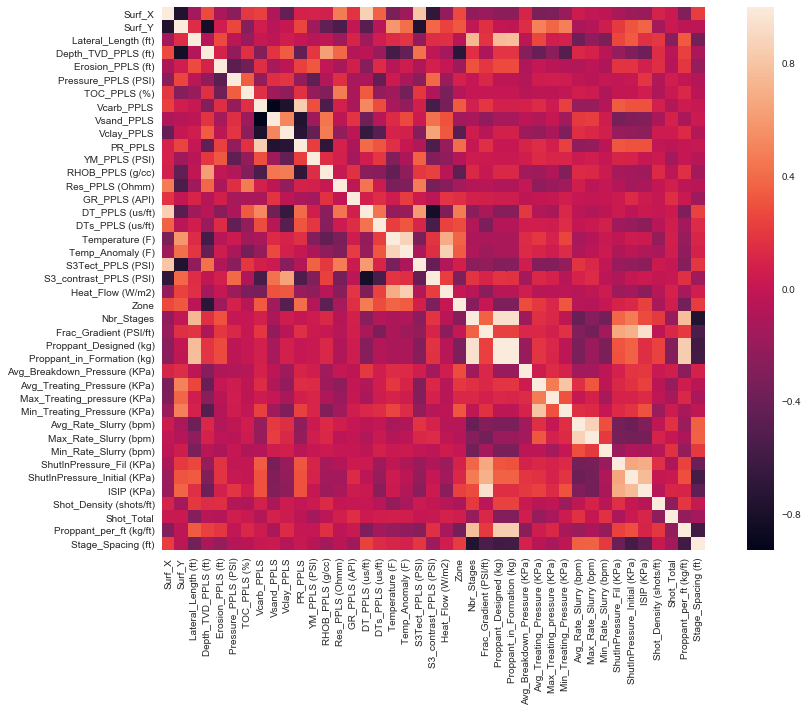

In [502]:
# Heatmap for correlation between variables

corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [503]:
# Variables with MV to estimate:

mv=df.isnull().sum()
print(mv)

API                              0
Surf_X                           0
Surf_Y                           0
Date_Drilling                   12
Date_Completion                  9
Date_Production                  2
Lateral_Length (ft)              0
Depth_TVD_PPLS (ft)              0
Erosion_PPLS (ft)                0
Pressure_PPLS (PSI)              5
TOC_PPLS (%)                     0
Vcarb_PPLS                       0
Vsand_PPLS                       0
Vclay_PPLS                       0
PR_PPLS                          0
YM_PPLS (PSI)                    0
RHOB_PPLS (g/cc)                 0
Res_PPLS (Ohmm)                  0
GR_PPLS (API)                    0
DT_PPLS (us/ft)                  0
DTs_PPLS (us/ft)                 0
Temperature (F)                  0
Temp_Anomaly (F)                 0
S3Tect_PPLS (PSI)                0
S3_contrast_PPLS (PSI)           0
Heat_Flow (W/m2)                 0
Zone                             0
Nbr_Stages                      41
Frac_Gradient (PSI/f

## Helpful functions

### Outliers extrection and replacing methods

In [504]:
def vis_and_return_Outl(df,column,factor_iqr,a=-6,b=6,delta=0.5):
    bins2=np.arange(a,b,delta)
    df.boxplot(column,return_type='dict',whis=factor_iqr)
    plt.title('outliers')
    y=df[column]
    x=range(1, len(y)+1)
   # plt.figure()
    #plt.title(column+ " plottet against random")
    #plt.plot(x,y,'.')
    plt.figure()
    plt.hist(df.dropna()[column],bins=bins2,normed=True,color='b')
    plt.xlabel(column)
   #quartiles
    Q1=np.percentile(df.dropna()[column],25)
    Q3=np.percentile(df.dropna()[column],75)
    iqr=Q3-Q1
    #identify outliers
    mean=np.mean(df[column])
    index=np.logical_or(df[column]< Q1 - factor_iqr*iqr, df[column]> Q3 + factor_iqr*iqr)
    outliers=df[index]
    return outliers

def outliers(df,column,factor_iqr):
    #quartiles
    Q1=np.percentile(df.dropna()[column],25)
    Q3=np.percentile(df.dropna()[column],75)
    iqr=Q3-Q1    
    #identify outliers
    mean=np.mean(df[column])
    index=np.logical_or(df[column]< Q1 - factor_iqr*iqr, df[column]> Q3 + factor_iqr*iqr)
    outliers=df[index]
    return outliers
    
def replace_by_mean(df,column,outliers):
    m=np.mean(df[column])
    df.loc[outliers.index,column]=m
    

### Correlated columns

To find, for a given column, another column with the highest possible correlation

In [505]:
def find_cor(name,df):
    cor=df.corr()
    index=df.columns.get_loc(name)
    if(index>2):#Dates fall out, to be corrected when we have dates
        index=index-3
    cor=cor[name]
    c=[np.abs(e) for e in cor]
    c[index]=0 # highsest correltion is with it self
    max_cor=np.max(c)
    print(max_cor)
    max_cor_index=c.index(max_cor)
    if( max_cor_index>2):
        max_cor_index=max_cor_index+3 # Dates fall out, calculate dataframe index
    max_cor_name=df.columns[max_cor_index]
    print(max_cor_name)
    return max_cor_name

### Linear 1D fit

In [506]:
def lin_regr(namex,namey):
    model = linear_model.LinearRegression()
    nansx= np.array(np.isnan(df[namex]))
    nansy= np.array(np.isnan(df[namey]))
    nan=np.logical_or(nansx,nansy)
    df_nonans=df[np.logical_not(nan)]
    x=df_nonans[namex].values
    x=[e for e in x]
    x=np.array(x)
    y=df_nonans[namey].values
    y=[e for e in y]
    y=np.array(y)
    model.fit(x[:, np.newaxis], y)
    res= model.coef_
    print("we estimate y= ax+b, with a equals:"+ str(res))
    return res

## Data processing (194 lines)

We select only those 194 lines, that do not have the group of 18 features missing

In [507]:
df=df[~ np.logical_and(np.isnan(df['Nbr_Stages']), np.isnan(df['Stage_Spacing (ft)'])  )] ## remove 97 lines with 18 missing
len(df)

194

As shown in the global analysis, these two variables belong to the set of variables that have 42 missing lines in common. We decided to cut these 42 lines off ( for these variables only) and do the cleaning on the remaining 194 lines. We treat them together as they have high correlation. We can estimate the missing vals of one by the ones of another. But we have to be careful not to use estimations of in one of the estiamtions of another. Also we want to remove the outliers before, so they do not influence the imputation and they can be estimated together with the missing values.


In [508]:
mv=df.isnull().sum()
print(mv)

API                              0
Surf_X                           0
Surf_Y                           0
Date_Drilling                    0
Date_Completion                  1
Date_Production                  0
Lateral_Length (ft)              0
Depth_TVD_PPLS (ft)              0
Erosion_PPLS (ft)                0
Pressure_PPLS (PSI)              1
TOC_PPLS (%)                     0
Vcarb_PPLS                       0
Vsand_PPLS                       0
Vclay_PPLS                       0
PR_PPLS                          0
YM_PPLS (PSI)                    0
RHOB_PPLS (g/cc)                 0
Res_PPLS (Ohmm)                  0
GR_PPLS (API)                    0
DT_PPLS (us/ft)                  0
DTs_PPLS (us/ft)                 0
Temperature (F)                  0
Temp_Anomaly (F)                 0
S3Tect_PPLS (PSI)                0
S3_contrast_PPLS (PSI)           0
Heat_Flow (W/m2)                 0
Zone                             0
Nbr_Stages                       0
Frac_Gradient (PSI/f

### Date_Drilling / Date_Completion / Date Production

Text(0.5,0,'deltaT_Comp_Prod')

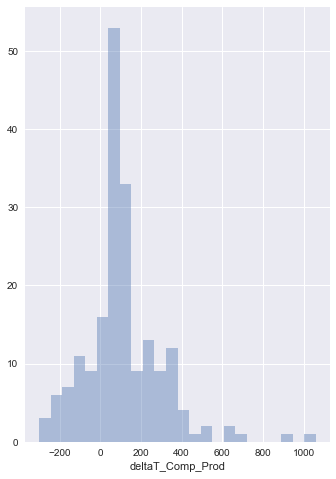

In [509]:
# Convert date variables to date time
# Missing dates

pd.to_datetime(df["Date_Drilling"])
df["Date_Drilling"]=pd.to_datetime(df["Date_Drilling"])
df["Date_Completion"]=pd.to_datetime(df["Date_Completion"])
df["Date_Production"]=pd.to_datetime(df["Date_Production"])
df["deltaT_Comp_Prod"]=(df["Date_Production"]-df["Date_Completion"]).dt.days
###
cols = df.columns.tolist()
df=df[cols[:6]+[cols[-1]]+cols[6:-1]]

#Visualizing distribution of deltaT_Dril_Comp  

plt.figure(figsize=(12,8))
plt.subplot(122)
sns.distplot(df.deltaT_Comp_Prod.dropna(),kde=False)
plt.xlabel("deltaT_Comp_Prod")

[(-300.0, 3.0),
 (-243.33333333333331, 6.0),
 (-186.66666666666669, 7.0),
 (-130.0, 11.0),
 (-73.333333333333343, 9.0),
 (-16.666666666666686, 16.0),
 (40.0, 53.0),
 (96.666666666666629, 33.0),
 (153.33333333333331, 9.0),
 (210.0, 13.0),
 (266.66666666666663, 9.0),
 (323.33333333333326, 12.0),
 (380.0, 4.0),
 (436.66666666666663, 1.0),
 (493.33333333333326, 2.0),
 (550.0, 0.0),
 (606.66666666666674, 2.0),
 (663.33333333333326, 1.0),
 (720.0, 0.0),
 (776.66666666666652, 0.0),
 (833.33333333333326, 0.0),
 (890.0, 1.0),
 (946.66666666666652, 0.0),
 (1003.3333333333331, 1.0)]

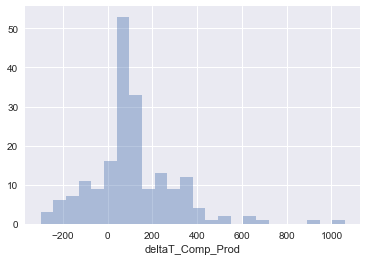

In [510]:
plt.figure()
[(h.get_x(),h.get_height()) for h in sns.distplot(df.deltaT_Comp_Prod.dropna(),kde=False).patches]
#On prend donc le mean des deux valeurs les plus fréquents:80.8 et 26.39 = 53.3 Jrs

In [511]:
df.iloc[:,3:7][df.iloc[:,3:7]["Date_Production"].map(lambda x: x.year)==2016]

,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod
49,2013-04-07,NaT,2016-06-04,NaN
127,2013-12-13,2014-04-15,2016-11-05,935.0
204,2013-09-17,2013-03-12,2016-02-05,1060.0


As we can see in the csv file there is only one line that has "Date_Completion" missing in the 194 lines group.


In [512]:
#Filling the missing date:
df.loc[49,'deltaT_Comp_Prod']=53.3
df.loc[49,'Date_Completion']=df.loc[49,'Date_Production']-dt.timedelta(days=df.loc[49,'deltaT_Comp_Prod'])

### ShutInPressure_Fil (KPa) and ShutInPressure_Initial

#### Outliers ....Fil
we use our customzied function vis_and return Outl

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
87,619,0.209695,0.278129,2013-07-22,2013-10-19,2013-12-26,68.0,-0.314611,-0.777143,-0.962765,...,0.111707,-0.109381,0.345648,-4.311710,0.144585,0.258222,-1.25369,0.181738,-0.343135,-0.311813
160,441,0.223969,0.284205,2013-04-22,2013-01-11,2013-12-31,354.0,-0.329546,-0.800281,-1.079575,...,-0.515885,-0.147805,0.093979,-6.253073,0.104858,-0.085216,-1.25369,0.181738,-0.481630,-0.217453


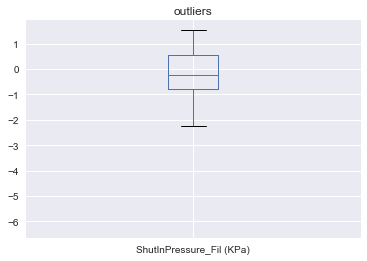

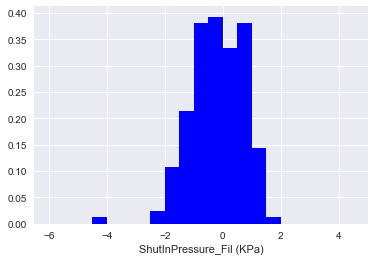

In [513]:
outs_Fil=vis_and_return_Outl(df,"ShutInPressure_Fil (KPa)",1.5,a=-6,b=5)
outs_Fil

We delete the outliers (API = 87 and 160).(to na)

In [514]:
rows=outs_Fil.index
df.loc[rows,'ShutInPressure_Fil (KPa)']=np.nan
df.loc[rows,'ShutInPressure_Fil (KPa)']# to verify the removal

87    NaN
160   NaN
Name: ShutInPressure_Fil (KPa), dtype: float64

#### Outliers  Shut.....Inital

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)


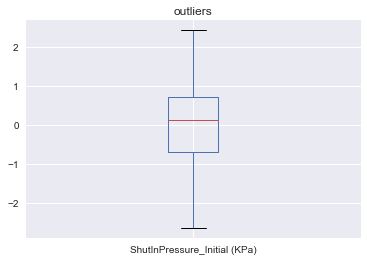

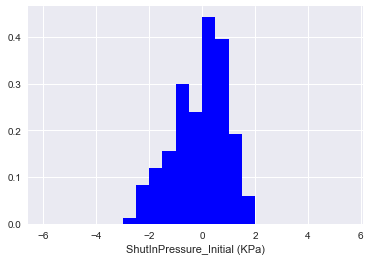

In [515]:
outs_Initial=vis_and_return_Outl(df,"ShutInPressure_Initial (KPa)",1.5)
outs_Initial

using the histogram, we decide not to change the small outlier.

#### Replace Missing Values

In [516]:
missing_Fil= np.isnan(df['ShutInPressure_Fil (KPa)'])
print('missing Fil:     '+  str(sum(missing_Fil)))
missing_Init= np.isnan(df['ShutInPressure_Initial (KPa)'])
print('missing Initial:  '+ str(sum(missing_Init)))
missing_both=np.logical_and(missing_Fil,missing_Init)
print('missing both:     '+ str(sum(missing_both)))
no_missing=np.logical_not(missing_both)
no_missing_Fil=np.logical_not(missing_Fil)
no_missing_Init=np.logical_not(missing_Init)
only_Fil_missing=np.logical_and(missing_Fil,no_missing_Init)
only_Init_missing=np.logical_and(missing_Init,no_missing_Fil)
cor=df[['ShutInPressure_Initial (KPa)','ShutInPressure_Fil (KPa)']].corr()
print('correlation     ' + str(cor.iloc[0,1]))

missing Fil:     20
missing Initial:  6
missing both:     2
correlation     0.799396947332


#### Estimate missing vals of ShutIn...Fil
As there is a high correlation between the two variables, we can  use linear regression to estimate the missing values that they do not have in common. The line, that both of them are missing has to be estimated by the means.

So we can try a linear fit with our customzed function:

In [517]:
a=lin_regr(find_cor('ShutInPressure_Fil (KPa)',df),'ShutInPressure_Fil (KPa)')
m1=np.mean(df['ShutInPressure_Initial (KPa)'])
m2=np.mean(df['ShutInPressure_Fil (KPa)'])
rows_Fil=df[only_Fil_missing].index
rows_both=df[missing_both].index
df.loc[rows_Fil,'ShutInPressure_Fil (KPa)']=(df['ShutInPressure_Initial (KPa)'][only_Fil_missing]- m1)*a+ m2
df.loc[rows_both,'ShutInPressure_Fil (KPa)']=m2
print (len(rows_Fil))

0.83997118237
ISIP (KPa)
we estimate y= ax+b, with a equals:[ 0.76416722]
18


we could not estimate one value as its missing in ShutInPressure_Initial as well. So we have to replace it with the mean.

now we have no more missing values. make scatter plot to check how the estimation was.

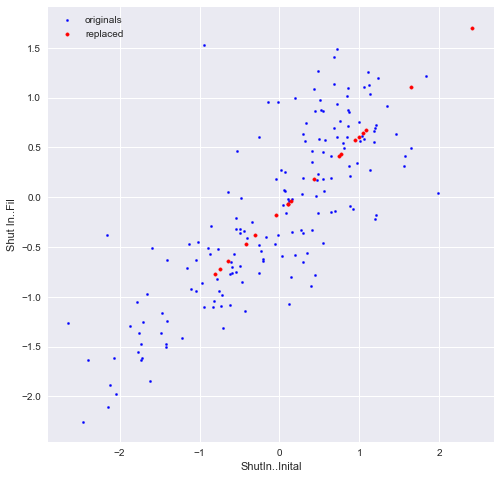

In [518]:
plt.figure(figsize=(8,8))
plt.scatter(df['ShutInPressure_Initial (KPa)'][no_missing_Fil],df['ShutInPressure_Fil (KPa)'][no_missing_Fil],color='blue',s=5,label='originals')
plt.scatter(df['ShutInPressure_Initial (KPa)'][~no_missing_Fil],df['ShutInPressure_Fil (KPa)'][~no_missing_Fil],color='red',s=12,label='replaced')
plt.xlabel('ShutIn..Inital')
plt.ylabel('Shut In..Fil')
plt.legend()

#### Estimate missing vals of ShutIn...Initial


In [519]:
a=lin_regr(find_cor('ShutInPressure_Initial (KPa)',df),'ShutInPressure_Initial (KPa)')
m1=np.mean(df['ShutInPressure_Fil (KPa)'])
m2=np.mean(df['ShutInPressure_Initial (KPa)'])
rows_In=df[only_Init_missing].index
df.loc[rows_In,'ShutInPressure_Initial (KPa)']=(df['ShutInPressure_Fil (KPa)'][only_Init_missing]- m1)*a+ m2
df.loc[rows_both,'ShutInPressure_Initial (KPa)']=m2# estimate with mean

0.814786905732
ShutInPressure_Fil (KPa)
we estimate y= ax+b, with a equals:[ 0.97100744]


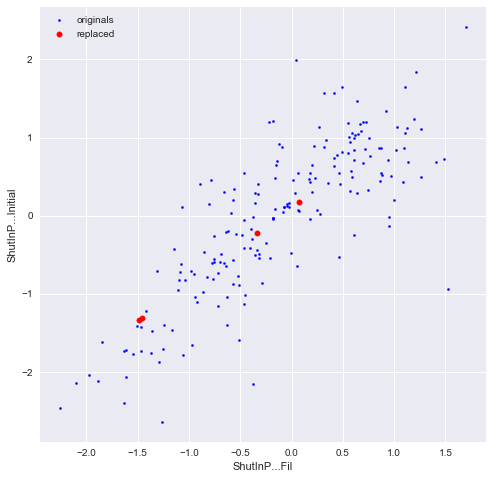

In [520]:
plt.figure(figsize=(8,8))
plt.scatter(df['ShutInPressure_Fil (KPa)'][~only_Init_missing],df['ShutInPressure_Initial (KPa)'][~only_Init_missing],color='blue',s=5,label='originals')
plt.scatter(df['ShutInPressure_Fil (KPa)'][only_Init_missing],df['ShutInPressure_Initial (KPa)'][only_Init_missing],color='red',s=30,label='replaced')
plt.ylabel('ShutInP...Initial')
plt.xlabel('ShutInP...Fil')
plt.legend()

### ISIP (KPa)
*Normalized Instantaneous Shut-In Pressure (PSI), proxy to the stress in the reservoir*
#### Outliers

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
44,58,0.442556,-1.555392,2012-08-27,2012-10-29,2014-03-31,518.0,-0.492584,1.896449,-0.555262,...,1.058123,1.026886,0.572946,-2.25563,-2.460132,-3.050678,-0.293176,-1.303237,-0.550391,1.652723


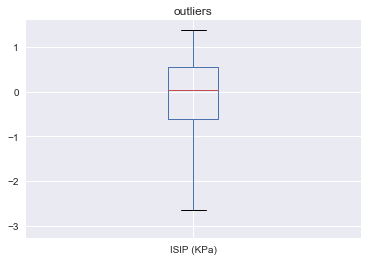

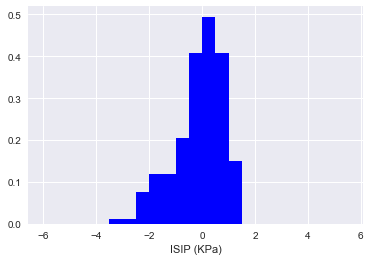

In [521]:
outs_Isip=vis_and_return_Outl(df,"ISIP (KPa)",2)
rows=df["ISIP (KPa)"][df["ISIP (KPa)"]>2].index
df.loc[rows,"ISIP (KPa)"]=np.nan # verified
outs_Isip

We replace the outlier by the mean.

In [522]:
df.loc[44,'ISIP (KPa)']=np.mean(df['ISIP (KPa)']) 

#### Replace missing values

In [523]:
missing_Isip= np.isnan(df['ISIP (KPa)'])
print('missing Isip:     '+  str(sum(missing_Isip)))
df[missing_Isip]

missing Isip:     3


,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
128,463,1.380605,-0.593429,2013-04-15,2013-02-05,2014-12-08,671.0,-0.379328,-0.391244,1.864418,...,0.506929,1.012937,0.313010,-0.383616,-0.305117,NaN,-0.773433,0.924226,-0.938268,0.279014
221,161,0.000346,-0.464729,2014-04-04,2014-08-24,2014-10-23,60.0,-0.230603,0.661447,0.531779,...,NaN,NaN,NaN,-0.178696,-0.036956,NaN,0.667339,-0.560750,NaN,-1.201949
228,276,2.413114,-2.012732,2013-06-28,2013-12-14,2015-08-19,613.0,-0.478271,1.183195,0.305952,...,0.886941,0.423230,0.667678,-0.640571,-0.641372,NaN,-0.754962,0.952783,-0.655605,-0.314357


In [524]:
find_cor('ISIP (KPa)',df)

0.903189633033
Frac_Gradient (PSI/ft)


'Frac_Gradient (PSI/ft)'

As ShutInPressure_Fil (KPa) has missing values or outliers in the same lines, we check the correlation with ShutIn..Inital is the highest ( not shown here. Luckily ShutInP....Fil did not have missing vals in the same lines. So we can use it to estimate the 3 missing vals:

we estimate y= ax+b, with a equals:[ 0.66350159]


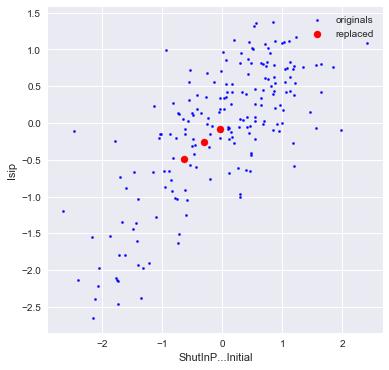

In [525]:
a3=lin_regr('ShutInPressure_Initial (KPa)','ISIP (KPa)')
m1=np.mean(df['ShutInPressure_Initial (KPa)'])
m2=np.mean(df['ISIP (KPa)'])
rows=df['ISIP (KPa)'][missing_Isip].index
df.loc[rows,'ISIP (KPa)']=(df['ShutInPressure_Initial (KPa)'][missing_Isip]- m1)*a3+ m2

plt.figure(figsize=(6,6))
plt.scatter(df['ShutInPressure_Initial (KPa)'][~missing_Isip],df['ISIP (KPa)'][~missing_Isip],color='blue',s=5,label='originals')
plt.scatter(df['ShutInPressure_Initial (KPa)'][missing_Isip],df['ISIP (KPa)'][missing_Isip],color='red',s=50,label='replaced')
plt.xlabel('ShutInP...Initial')
plt.ylabel('Isip')
plt.legend()

### Proppant_per_ft
*Normalized Weight of proppant pumped during completion normalzied per feet (kg/ft)*




#### Outliers


,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
11,7,-0.101826,-0.543508,2014-06-17,2014-06-10 00:00:00,2015-01-26,230.0,1.697227,0.895719,0.777759,...,-0.488681,-0.649272,-0.892759,-0.150821,0.649564,0.821407,0.667339,0.181738,2.000416,-1.237434
17,125,-0.210227,-0.269186,2014-12-28,2015-06-05 00:00:00,2015-03-09,-88.0,1.566548,0.559451,1.424884,...,-0.706327,-0.739125,-0.855517,1.108935,1.062269,0.415960,0.667339,-2.020122,2.059906,-1.224804
18,141,-0.480440,0.775366,2014-05-04,2014-07-23 00:00:00,2014-07-09,-14.0,0.742646,-0.815376,-0.924612,...,-0.946942,-0.729597,0.208531,1.409205,0.685262,-0.011269,1.589433,0.211438,1.874893,-1.271133
31,538,-0.236855,0.187020,2014-06-13,2014-09-10 00:00:00,2014-11-25,76.0,0.417815,-0.170574,0.838514,...,-0.538508,0.047778,-0.727619,0.586550,1.054447,0.552219,-1.211929,0.181738,2.015487,-1.234429
33,522,1.022006,-1.619928,2014-10-23,2015-01-14 00:00:00,2015-03-15,60.0,1.865243,1.486138,0.357082,...,-0.683662,-0.855553,-0.637500,1.265617,0.488946,-0.431029,-1.222198,0.169566,1.980735,-1.220407
35,751,-0.302516,-0.312210,2014-07-06,2015-01-26 00:00:00,2015-05-04,98.0,0.742024,0.731980,1.528675,...,-0.494246,0.674499,-1.313777,0.561125,1.011186,0.174238,0.667339,-0.545597,1.838070,-1.725533
36,487,-0.073028,-0.535067,2014-09-14,2015-11-03 00:00:00,2015-02-08,-268.0,1.291499,0.851803,0.691905,...,-1.237366,0.381684,NaN,-0.178696,-0.036956,-0.208470,0.667339,-0.560750,1.890912,-1.223798
38,480,-0.209012,0.201088,2014-08-07,2014-10-13 00:00:00,2014-01-12,-274.0,0.701576,-0.222659,0.878901,...,0.491538,0.290580,-0.318883,0.880920,0.523589,1.324763,-1.227375,0.181738,4.525215,-1.648490
49,640,0.098034,1.582837,2013-04-07,2016-04-11 16:48:00,2016-06-04,53.3,0.304560,-2.452614,-0.569148,...,-3.213068,-2.427199,-0.468899,1.194239,1.235577,1.169842,-0.773433,0.924226,-1.596762,1.037403
61,494,-0.461484,-0.180266,2015-01-20,2015-10-05 00:00:00,2015-12-08,64.0,1.437736,0.681697,0.865269,...,-0.402763,0.391495,-0.512073,0.468299,0.410480,-0.055963,0.667339,-0.560750,1.988407,-1.233393


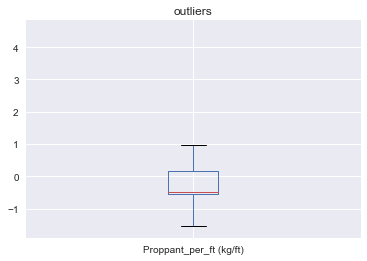

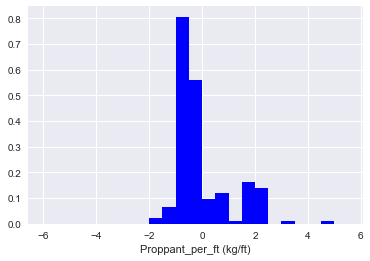

In [526]:
outs_Propp=vis_and_return_Outl(df,"Proppant_per_ft (kg/ft)",1.5)
outs_Propp

Looking at the histogram, we decide to change the outlying values > 4 to a less extreme value.

In [527]:
rows=df[df["Proppant_per_ft (kg/ft)"]>4].index
df.loc[rows,"Proppant_per_ft (kg/ft)"]=np.mean(df["Proppant_per_ft (kg/ft)"])

#### Missing Values

In [528]:
missing_Prop=np.isnan(df["Proppant_per_ft (kg/ft)"]) # 1 value
find_cor('Proppant_per_ft (kg/ft)',df)

0.799730223461
Proppant_in_Formation (kg)


'Proppant_in_Formation (kg)'

In [529]:
a3=lin_regr('Proppant_Designed (kg)','Proppant_per_ft (kg/ft)')
m1=np.mean(df['Proppant_Designed (kg)'])
m2=np.mean(df['Proppant_Designed (kg)'])
rows=df['Proppant_per_ft (kg/ft)'][missing_Prop].index
df.loc[rows,'Proppant_per_ft (kg/ft)']=(df['Proppant_Designed (kg)'][missing_Prop]- m1)*a3+ m2

we estimate y= ax+b, with a equals:[ 0.75578907]


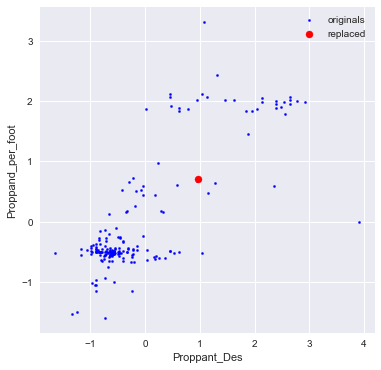

In [530]:
plt.figure(figsize=(6,6))
plt.scatter(df['Proppant_Designed (kg)'][~missing_Prop],df['Proppant_per_ft (kg/ft)'][~missing_Prop],color='blue',s=5,label='originals')
plt.scatter(df['Proppant_Designed (kg)'][missing_Prop],df['Proppant_per_ft (kg/ft)'][missing_Prop],color='red',s=50,label='replaced')
plt.xlabel('Proppant_Des')
plt.ylabel('Proppand_per_foot')
plt.legend()

### Proppant_in_Formation (kg)

#### Outliers

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)


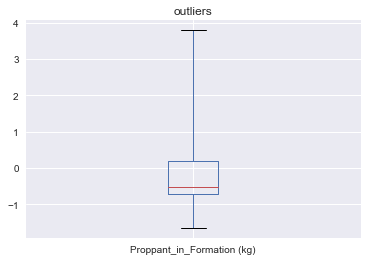

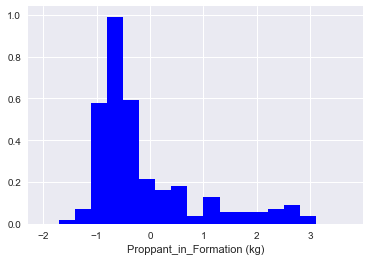

In [531]:
outs_Propp_Form=vis_and_return_Outl(df,"Proppant_in_Formation (kg)",4,delta=0.3,a=-2,b=4)
outs_Propp_Form

#### Missing Values

In [532]:
missing_Prop_Form=np.isnan(df["Proppant_in_Formation (kg)"]) # 1 value
find_cor('Proppant_in_Formation (kg)',df)

0.998871621011
Proppant_Designed (kg)


'Proppant_Designed (kg)'

In [533]:
a4=lin_regr('Proppant_Designed (kg)','Proppant_in_Formation (kg)')
m1=np.mean(df['Proppant_Designed (kg)'])
m2=np.mean(df['Proppant_Designed (kg)'])
rows=df['Proppant_in_Formation (kg)'][missing_Prop].index
df.loc[rows,'Proppant_in_Formation (kg)']=(df['Proppant_Designed (kg)'][missing_Prop]- m1)*a3+ m2

we estimate y= ax+b, with a equals:[ 0.99896482]


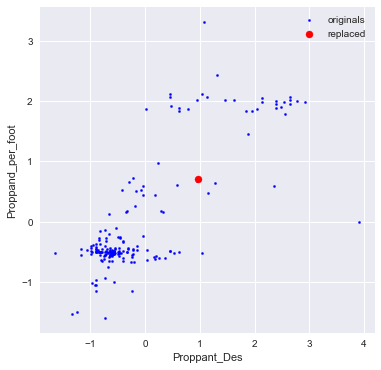

In [534]:
plt.figure(figsize=(6,6))
plt.scatter(df['Proppant_Designed (kg)'][~missing_Prop],df['Proppant_per_ft (kg/ft)'][~missing_Prop],color='blue',s=5,label='originals')
plt.scatter(df['Proppant_Designed (kg)'][missing_Prop],df['Proppant_per_ft (kg/ft)'][missing_Prop],color='red',s=50,label='replaced')
plt.xlabel('Proppant_Des')
plt.ylabel('Proppand_per_foot')
plt.legend()

### Avg_Breakdown_Pressure (KPa)

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
43,297,0.610026,-0.004224,2014-03-20,2014-08-13,2014-11-22,101.0,1.403510,-0.651916,-1.020316,...,-1.088836,-0.794859,-0.973107,-0.464512,0.547604,-0.216831,0.667339,-0.560750,-0.612267,-0.188090
58,99,0.415835,-0.199180,2013-05-20,2014-08-03,2014-03-05,-151.0,-1.173361,-0.197781,-1.241281,...,-0.267348,-0.385934,0.431449,-0.561384,0.343135,0.037660,-1.253690,0.181738,-0.416286,-0.226474
74,60,-0.382794,0.830152,2014-08-22,2015-04-02,2015-09-05,156.0,1.433380,-0.975140,-0.775980,...,-2.013844,-1.987019,-1.101833,0.551765,1.187099,0.738545,0.692127,-0.484106,-0.600647,-0.097479


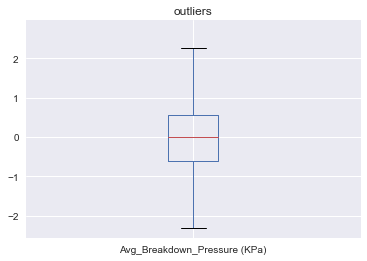

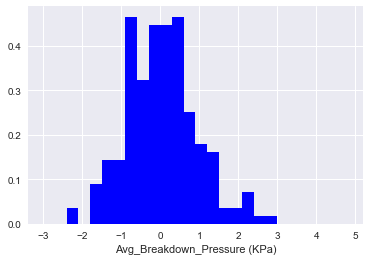

In [535]:
outs_Abp=vis_and_return_Outl(df,'Avg_Breakdown_Pressure (KPa)',1.5,delta=0.3,a=-3,b=5)
outs_Abp

We do not see huge outliers.

#### Missing Values

In [536]:
missing_Abp=np.isnan(df["Avg_Breakdown_Pressure (KPa)"]) # 1 value
df[missing_Abp] # 4 missing values

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
55,89,0.097504,-1.156570,2012-04-11,2012-12-18,2013-04-28,131.0,-0.746475,1.656275,-0.688549,...,0.822106,0.386192,0.799660,-1.055466,-1.786306,-0.242325,0.667339,-0.560750,-0.448796,0.138586
73,466,0.105477,-0.348533,2013-04-01,2013-07-04,2013-06-28,-6.0,-0.930048,0.360398,0.194773,...,1.251988,0.553912,0.836650,-0.760731,-0.261445,0.359970,-0.773433,0.924226,-0.502659,0.335789
221,161,0.000346,-0.464729,2014-04-04,2014-08-24,2014-10-23,60.0,-0.230603,0.661447,0.531779,...,NaN,NaN,NaN,-0.178696,-0.036956,-0.083116,0.667339,-0.560750,0.708264,-1.201949
222,578,0.656337,-0.845575,2011-07-19,2011-08-29,2011-01-10,-231.0,-1.111132,0.714587,-1.425870,...,0.645298,0.574355,0.618225,-1.492132,-1.343424,-2.374262,-0.293176,1.666713,-0.201509,1.221423


As there is no other variable with high correlation, we just replace missing values by mean.

In [537]:
rows=df[missing_Abp].index
df.loc[rows,'Avg_Breakdown_Pressure (KPa)']=np.mean(df['Avg_Breakdown_Pressure (KPa)'])

### Avg/Min/Max_Treating_Pressure (KPa)


we treat this variables together  as they are highly correlated.

cor(Avg,Min) =0.80
cor(Avg,Max) =0.46
cor(Min,Max) =0.30

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)


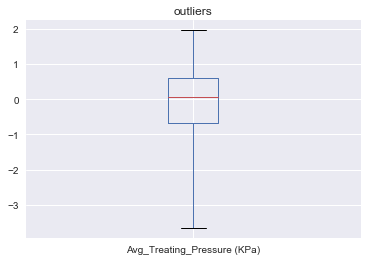

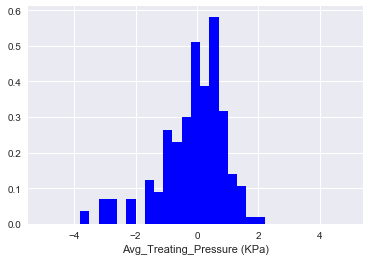

In [538]:
outs_Atp=vis_and_return_Outl(df,'Avg_Treating_Pressure (KPa)',3,delta=0.3,a=-5,b=5)#
outs_Atp

To the left side of the histogram, it seems that there are same outliers.
We plot against correlated variables to see more..

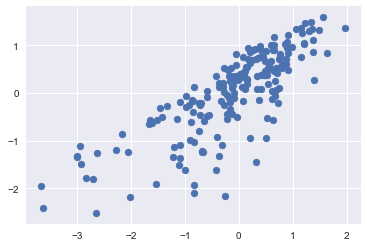

In [539]:
plt.scatter(df['Avg_Treating_Pressure (KPa)'],df['Min_Treating_Pressure (KPa)'])

    We decided only to delete the outliers with values < - 2.5


In [540]:
rows=outs_Atp.index
df.loc[rows,'Avg_Treating_Pressure (KPa)']=np.nan


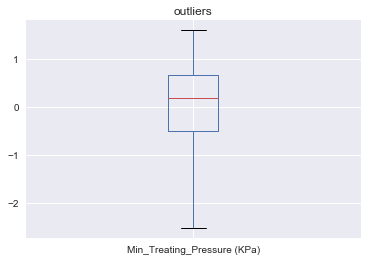

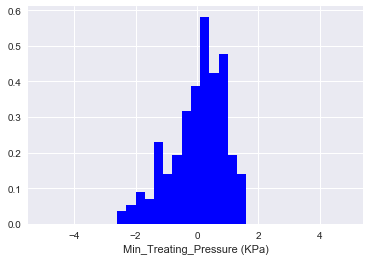

In [541]:
outs_Mitp=vis_and_return_Outl(df,'Min_Treating_Pressure (KPa)',4.1,delta=0.3,a=-5,b=5)
rows=outs_Mitp.index
df.loc[rows,'Min_Treating_Pressure (KPa)']=np.nan # delete outliers determinded by boxplot

In [542]:
outs_Mitp

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)


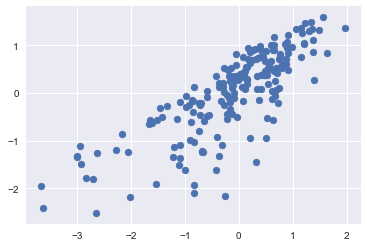

In [543]:
plt.scatter(df['Avg_Treating_Pressure (KPa)'],df['Min_Treating_Pressure (KPa)'])
rows=df[df['Min_Treating_Pressure (KPa)'] >1.4].index
df.loc[rows,'Min_Treating_Pressure (KPa)']=0

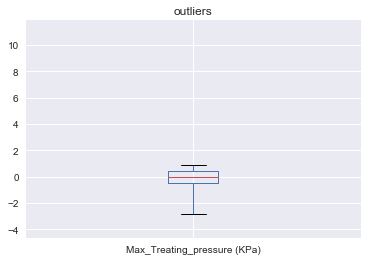

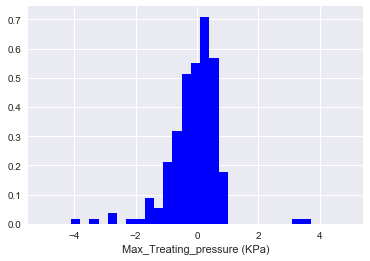

In [544]:
outs_Matp=vis_and_return_Outl(df,'Max_Treating_pressure (KPa)',3,delta=0.3,a=-5,b=5)
df.loc[rows,'Min_Treating_Pressure (KPa)']=np.nan # delete outliers determinded by boxplot

In [545]:
outs_Matp

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
127,109,-2.352500,1.620195,2013-12-13,2014-04-15,2016-11-05,935.0,-1.280393,0.298965,0.809975,...,0.538420,0.546580,0.459046,-0.040905,0.116732,-0.212683,-1.253690,0.181738,-0.132707,-0.560197
153,775,0.195680,0.655966,2014-02-13,2014-02-08,2014-09-17,221.0,-0.578459,-1.333584,-1.633377,...,-0.433414,-0.536376,-0.750022,-0.324553,0.271600,-0.615375,-1.253690,0.181738,1.838079,-1.189494
204,260,-2.158496,1.665525,2013-09-17,2013-03-12,2016-02-05,1060.0,-0.669312,-0.162375,1.004901,...,-1.027368,-1.447592,0.253667,-0.468786,-0.416572,0.191529,-1.253690,0.181738,-0.754003,-0.222105
222,578,0.656337,-0.845575,2011-07-19,2011-08-29,2011-01-10,-231.0,-1.111132,0.714587,-1.425870,...,0.645298,0.574355,0.618225,-1.492132,-1.343424,-2.374262,-0.293176,1.666713,-0.201509,1.221423
230,233,0.105716,-0.328896,2013-06-26,2013-09-12,2014-01-30,140.0,-1.270437,0.327135,0.205354,...,-2.195671,-3.274215,0.231525,0.172257,0.468252,-0.046052,-1.253690,0.181738,1.873128,-1.200995


In [546]:
df[df['Max_Treating_pressure (KPa)']>10]

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
153,775,0.19568,0.655966,2014-02-13,2014-02-08,2014-09-17,221.0,-0.578459,-1.333584,-1.633377,...,-0.433414,-0.536376,-0.750022,-0.324553,0.2716,-0.615375,-1.25369,0.181738,1.838079,-1.189494


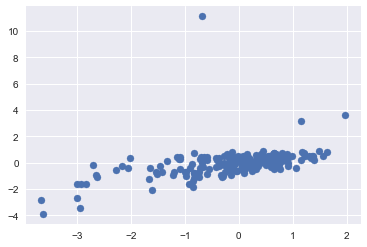

In [547]:
plt.scatter(df['Avg_Treating_Pressure (KPa)'],df['Max_Treating_pressure (KPa)'])
rows=df[df['Min_Treating_Pressure (KPa)'] >2].index
df.loc[rows,'Min_Treating_Pressure (KPa)']=0
df.loc[153,'Max_Treating_pressure (KPa)']=np.mean(df['Min_Treating_Pressure (KPa)'])

#### replace the missing values


In [548]:
missing_Atp=np.isnan(df["Avg_Treating_Pressure (KPa)"])
missing_Mitp=np.isnan(df["Min_Treating_Pressure (KPa)"])
missing_Matp=np.isnan(df["Max_Treating_pressure (KPa)"])
print (sum(missing_Atp))
print (sum(missing_Mitp))
print (sum(missing_Matp))

1
4
1


In [549]:
missing_all=np.logical_and(missing_Atp,missing_Mitp)
missing_all=np.logical_and(missing_all,missing_Matp)
print (sum(missing_all))

1


We have one missing values that all the three features have missing. We have to estimate them by the mean.

In [550]:
rows=df[missing_all].index
df.loc[rows,"Avg_Treating_Pressure (KPa)"]=np.mean(df['Avg_Treating_Pressure (KPa)'])
df.loc[rows,"Min_Treating_Pressure (KPa)"]=np.mean(df['Min_Treating_Pressure (KPa)'])
df.loc[rows,"Max_Treating_pressure (KPa)"]=np.mean(df['Max_Treating_pressure (KPa)'])

Estimate the rest of the missing vals each variable by another.

In [551]:
mA=np.mean(df['Avg_Treating_Pressure (KPa)'])
mMi=np.mean(df['Min_Treating_Pressure (KPa)'])
mMa=np.mean(df['Max_Treating_pressure (KPa)'])


#### Missing Avg

In [552]:
AvNotMin=np.logical_and(missing_Atp,~missing_Mitp)
print (sum(AvNotMin))
AvNotMax=np.logical_and(missing_Atp,~missing_Matp)
print (sum(AvNotMax))

0
0


#### Missing Min

In [553]:
MinNotAv=np.logical_and(~missing_Atp,missing_Mitp)
print (sum(MinNotAv))
MinNotMax=np.logical_and(missing_Mitp,~missing_Matp)
print (sum(MinNotMax))

3
3


#### Missing Max

In [554]:
MaxNotAv=np.logical_and(~missing_Atp,missing_Matp)
print (sum(MaxNotAv))
MaxNotMin=np.logical_and(~missing_Mitp,missing_Matp)
print (sum(MaxNotMin))

0
0


We see can see that we only have a missing val with the three dfeatures missing and no val that we ca estimate by another.

In [555]:
missing_Atp=np.isnan(df["Avg_Treating_Pressure (KPa)"])
missing_Mitp=np.isnan(df["Min_Treating_Pressure (KPa)"])
missing_Matp=np.isnan(df["Max_Treating_pressure (KPa)"])
print (sum(missing_Atp))
print (sum(missing_Mitp))
print (sum(missing_Matp))

0
3
0


### Avg/Min/Max_Rate_Slurry (bpm)

We we treat this variables together as they are highly correlated.

Cor(Avg,Max) = 0.84 , Cor(Avg,Min) = 0.36 , Cor(Max,Min) = 0.4

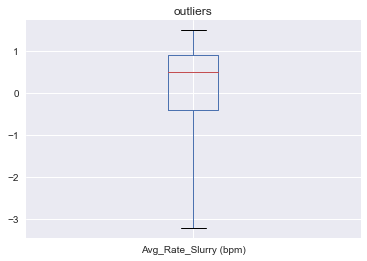

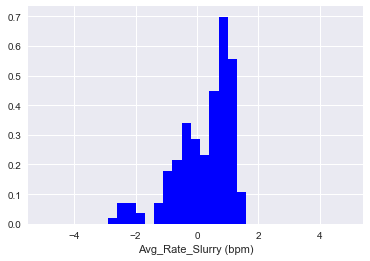

In [556]:
Avg_slr=vis_and_return_Outl(df,'Avg_Rate_Slurry (bpm)',3,delta=0.3,a=-5,b=5)

To the left side of the histogram, it seems that there are same outliers. We plot against correlated variables to see more..

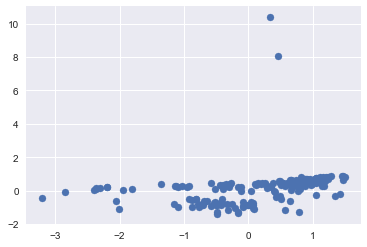

In [557]:
plt.scatter(df['Avg_Rate_Slurry (bpm)'],df['Min_Rate_Slurry (bpm)'])

We decided only to delete the outliers with values > 2

In [558]:
rows=Avg_slr.index
df.loc[rows,'Avg_Rate_Slurry (bpm)']=np.nan

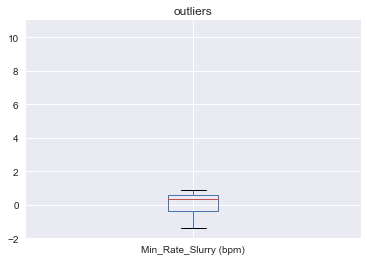

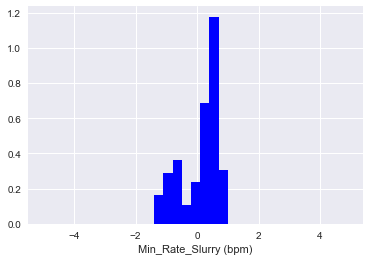

In [559]:
Min_slr=vis_and_return_Outl(df,'Min_Rate_Slurry (bpm)',4.1,delta=0.3,a=-5,b=5)
df[df['Min_Rate_Slurry (bpm)'] >2].index
df.loc[rows,'Min_Rate_Slurry (bpm)']=np.nan # delete outliers determinded by boxplot

In [560]:
rows=Avg_slr.index
df.loc[rows,'Avg_Rate_Slurry (bpm)']=np.nan

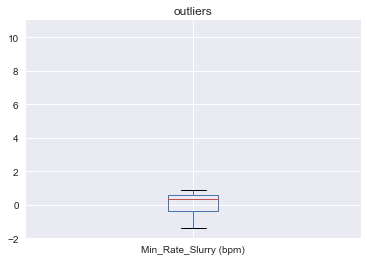

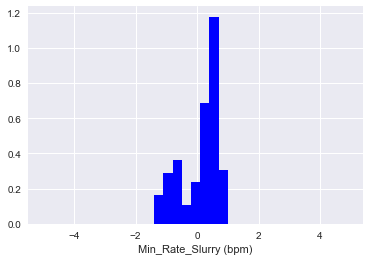

In [561]:
Max_slr=vis_and_return_Outl(df,'Min_Rate_Slurry (bpm)',4.1,delta=0.3,a=-5,b=5)
rows=Min_slr.index
df.loc[rows,'Min_Rate_Slurry (bpm)']=np.nan # delete outliers determinded by boxplot

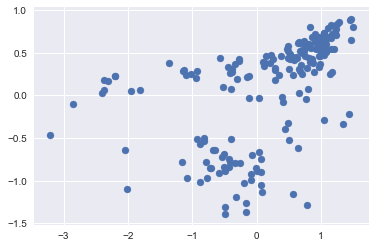

In [562]:
plt.scatter(df['Avg_Rate_Slurry (bpm)'],df['Min_Rate_Slurry (bpm)'])
rows=df[df['Min_Rate_Slurry (bpm)'] >1.4].index
df.loc[rows,'Min_Rate_Slurry (bpm)']=0

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)


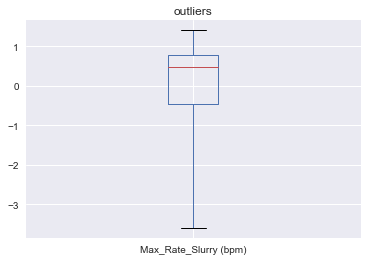

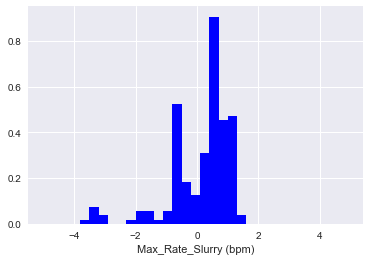

In [563]:
Max_slr=vis_and_return_Outl(df,'Max_Rate_Slurry (bpm)',3,delta=0.3,a=-5,b=5)
Max_slr

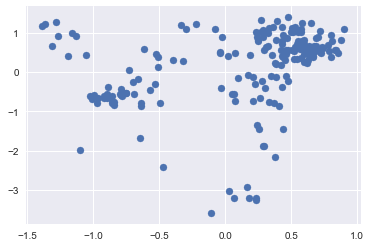

In [564]:
plt.scatter(df['Min_Rate_Slurry (bpm)'],df['Max_Rate_Slurry (bpm)'])

In [565]:
rows=Max_slr.index
df.loc[rows,'Max_Rate_Slurry (bpm)']=np.nan # delete outliers determinded by boxplot
rows2=df[df['Max_Rate_Slurry (bpm)']> 1].index
df.loc[rows2,'Max_Rate_Slurry (bpm)']=np.nan # delete outliers > 1 ( see plot)

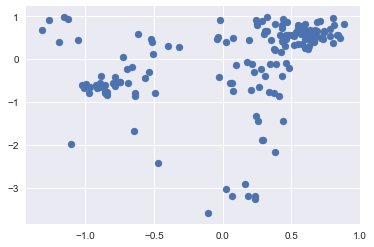

In [566]:
plt.scatter(df['Min_Rate_Slurry (bpm)'],df['Max_Rate_Slurry (bpm)'])

#### replace the missing values¶


In [567]:
missing_Atp=np.isnan(df["Avg_Rate_Slurry (bpm)"])
missing_Mitp=np.isnan(df["Min_Rate_Slurry (bpm)"])
missing_Matp=np.isnan(df["Max_Rate_Slurry (bpm)"])
print (sum(missing_Atp))
print (sum(missing_Mitp))
print (sum(missing_Matp))

1
4
31


In [568]:
missing_all=np.logical_and(missing_Atp,missing_Mitp)
missing_all=np.logical_and(missing_all,missing_Matp)
print (sum(missing_all))

1


We have two missing values that all the 97 features have missing. We have to estimate them by the mean

Estimate the rest of the missong vals each variable by another.

In [569]:
mA=np.mean(df['Avg_Rate_Slurry (bpm)'])
mMi=np.mean(df['Min_Rate_Slurry (bpm)'])
mMa=np.mean(df['Max_Rate_Slurry (bpm)'])



#### Missing Avg


In [570]:
AvNotMin=np.logical_and(missing_Atp,~missing_Mitp)
print (sum(AvNotMin))
AvNotMax=np.logical_and(missing_Atp,~missing_Matp)
print (sum(AvNotMax))

0
0


In [571]:
a3=lin_regr('Max_Rate_Slurry (bpm)','Avg_Rate_Slurry (bpm)')
rows=df[AvNotMax].index
df.loc[rows,'Avg_Rate_Slurry (bpm)']=(df['Max_Rate_Slurry (bpm)'][AvNotMax]- mMa)*a3+ mA

we estimate y= ax+b, with a equals:[ 0.87033919]


In [572]:
rows=df[missing_all].index
df.loc[rows,"Avg_Rate_Slurry (bpm)"]=np.mean(df['Avg_Rate_Slurry (bpm)'])
df.loc[rows,"Min_Rate_Slurry (bpm)"]=np.mean(df['Min_Rate_Slurry (bpm)'])
df.loc[rows,"Max_Rate_Slurry (bpm)"]=np.mean(df['Max_Rate_Slurry (bpm)'])

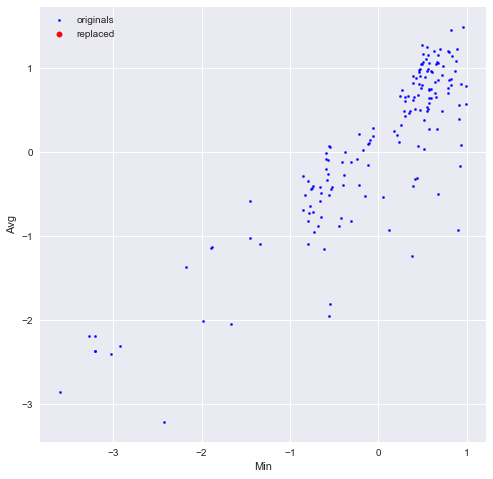

In [573]:
plt.figure(figsize=(8,8))
plt.scatter(df['Max_Rate_Slurry (bpm)'][~AvNotMax],df['Avg_Rate_Slurry (bpm)'][~AvNotMax],color='blue',s=5,label='originals')
plt.scatter(df['Max_Rate_Slurry (bpm)'][AvNotMax],df['Avg_Rate_Slurry (bpm)'][AvNotMax],color='red',s=30,label='replaced')
plt.ylabel('Avg')
plt.xlabel('Min')
plt.legend()

#### Missing Min


In [574]:
MinNotAv=np.logical_and(~missing_Atp,missing_Mitp)
print (sum(MinNotAv))
MinNotMax=np.logical_and(missing_Mitp,~missing_Matp)
print (sum(MinNotMax))

3
2


In [575]:
a3=lin_regr('Max_Rate_Slurry (bpm)','Min_Rate_Slurry (bpm)')
rows=df[MinNotMax].index
df.loc[rows,'Min_Rate_Slurry (bpm)']=(df['Max_Rate_Slurry (bpm)'][MinNotMax]- mMa)*a3+ mMi

we estimate y= ax+b, with a equals:[ 0.20102231]


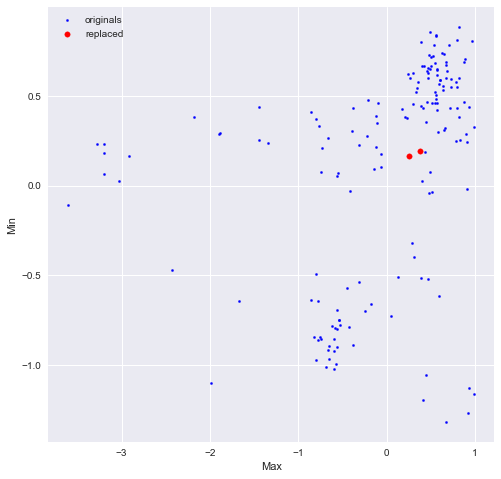

In [576]:
plt.figure(figsize=(8,8))
plt.scatter(df['Max_Rate_Slurry (bpm)'][~MinNotMax],df['Min_Rate_Slurry (bpm)'][~MinNotMax],color='blue',s=5,label='originals')
plt.scatter(df['Max_Rate_Slurry (bpm)'][MinNotMax],df['Min_Rate_Slurry (bpm)'][MinNotMax],color='red',s=30,label='replaced')
plt.ylabel('Min')
plt.xlabel('Max')
plt.legend()

In [577]:
a3=lin_regr('Avg_Rate_Slurry (bpm)','Min_Rate_Slurry (bpm)')
rows=df[MinNotAv].index
df.loc[rows,'Min_Rate_Slurry (bpm)']=(df['Avg_Rate_Slurry (bpm)'][MinNotAv]- mMa)*a3+ mMi

we estimate y= ax+b, with a equals:[ 0.31939433]


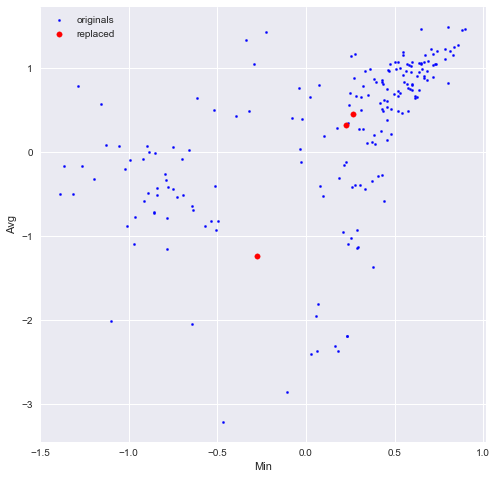

In [578]:
plt.figure(figsize=(8,8))
plt.scatter(df['Min_Rate_Slurry (bpm)'][~MinNotAv],df['Avg_Rate_Slurry (bpm)'][~MinNotAv],color='blue',s=5,label='originals')
plt.scatter(df['Min_Rate_Slurry (bpm)'][MinNotAv],df['Avg_Rate_Slurry (bpm)'][MinNotAv],color='red',s=30,label='replaced')
plt.ylabel('Avg')
plt.xlabel('Min')
plt.legend()

#### Missing Max

In [579]:
MaxNotAv=np.logical_and(~missing_Atp,missing_Matp)
print (sum(MaxNotAv))
MaxNotMin=np.logical_and(~missing_Mitp,missing_Matp)
print (sum(MaxNotMin))

30
29


In [580]:
a3=lin_regr('Min_Rate_Slurry (bpm)','Max_Rate_Slurry (bpm)')
rows=df[MaxNotMin].index

df.loc[rows,'Max_Rate_Slurry (bpm)']=(df['Min_Rate_Slurry (bpm)'][MaxNotMin]- mMi)*a3+ mMa

we estimate y= ax+b, with a equals:[ 0.51293473]


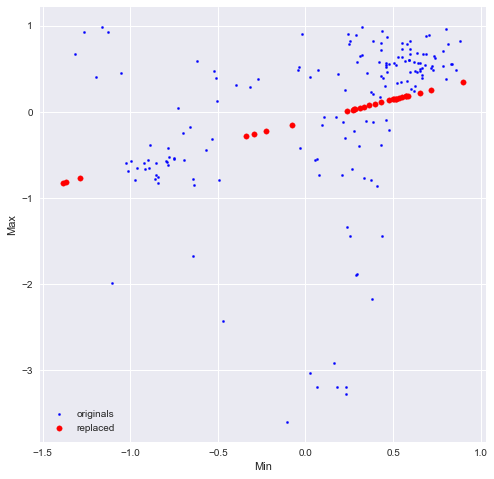

In [581]:
plt.figure(figsize=(8,8))
plt.scatter(df['Min_Rate_Slurry (bpm)'][~MaxNotMin],df['Max_Rate_Slurry (bpm)'][~MaxNotMin],color='blue',s=5,label='originals')
plt.scatter(df['Min_Rate_Slurry (bpm)'][MaxNotMin],df['Max_Rate_Slurry (bpm)'][MaxNotMin],color='red',s=30,label='replaced')
plt.ylabel('Max')
plt.xlabel('Min')
plt.legend()

In [582]:
a3=lin_regr('Avg_Rate_Slurry (bpm)','Max_Rate_Slurry (bpm)')
rows=df[MaxNotAv].index
df.loc[rows,'Max_Rate_Slurry (bpm)']=(df['Avg_Rate_Slurry (bpm)'][MaxNotAv]- mMa)*a3+ mMa

we estimate y= ax+b, with a equals:[ 0.79158775]


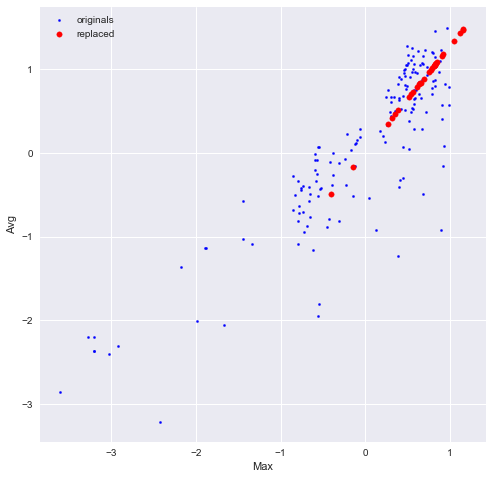

In [583]:
plt.figure(figsize=(8,8))
plt.scatter(df['Max_Rate_Slurry (bpm)'][~MaxNotAv],df['Avg_Rate_Slurry (bpm)'][~MaxNotAv],color='blue',s=5,label='originals')
plt.scatter(df['Max_Rate_Slurry (bpm)'][MaxNotAv],df['Avg_Rate_Slurry (bpm)'][MaxNotAv],color='red',s=30,label='replaced')
plt.ylabel('Avg')
plt.xlabel('Max')
plt.legend()

In [584]:


missing_Atp=np.isnan(df["Avg_Treating_Pressure (KPa)"])
missing_Mitp=np.isnan(df["Min_Treating_Pressure (KPa)"])
missing_Matp=np.isnan(df["Max_Treating_pressure (KPa)"])
print (sum(missing_Atp))
print (sum(missing_Mitp))
print (sum(missing_Matp))



0
3
0


### Zone

Taking in consideration Andi s analysis about the zone Attribute, It s a categorial variable, i ll change the zone values to 0-9

In [585]:
df.Zone.unique()

array([-0.45747705,  1.10622683, -0.97871168,  0.58499221, -2.02118093,
        2.66993072,  2.14869609, -2.54241556,  0.06375758, -1.49994631])

In [586]:
df =    df.replace({'Zone':{
        df.Zone.unique()[0]: 'Z0',
        df.Zone.unique()[1]: 'Z1',
        df.Zone.unique()[2]: 'Z2',
        df.Zone.unique()[3]: 'Z3',
        df.Zone.unique()[4]: 'Z4',
        df.Zone.unique()[5]: 'Z5',
        df.Zone.unique()[6]: 'Z6',
        df.Zone.unique()[7]: 'Z7',
        df.Zone.unique()[8]: 'Z8',
        df.Zone.unique()[9]: 'Z9'
    
        }
                      }
)



The idea is to affect to missing values of the concerned variables (see further) in the zone of the well, as we have seen for the train set OilCum and GasCum could be splitted with a pattern ruled by Zone.


### Pressure_PPLS (PSI)

In [494]:
#MV

df["Pressure_PPLS (PSI)"].isnull().sum()

1

In [495]:
missing= np.isnan(df["Pressure_PPLS (PSI)"])
df.loc[df["Pressure_PPLS (PSI)"].isnull(), ["API","Pressure_PPLS (PSI)","Zone"]]

,API,Pressure_PPLS (PSI),Zone
49,640,NaN,Z5


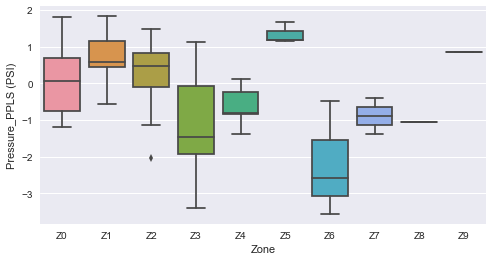

In [496]:
sns.boxplot(x='Zone', y='Pressure_PPLS (PSI)', data=df,whis=1.5)

An idea that would be good is to affect to missing values the mean the variable in the zone of the well


In [587]:
w49=np.mean(df[df["Zone"]=="Z5"][~missing]['Pressure_PPLS (PSI)'])

C:\Users\EDDAHABI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [588]:
df.loc[missing,"Pressure_PPLS (PSI)"]=w49

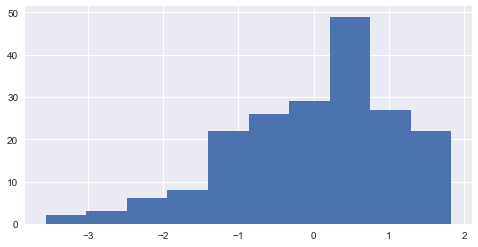

In [589]:
# Check distribution 

plt.rcParams['figure.figsize'] = (8.0,4.0)
(df["Pressure_PPLS (PSI)"]).hist()

Text(0.5,1,'IQR = 2')

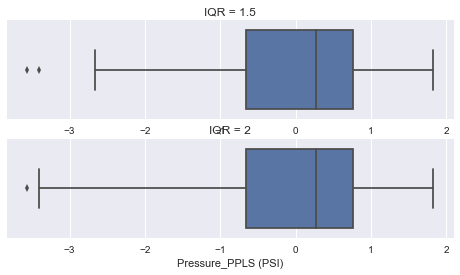

In [590]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df["Pressure_PPLS (PSI)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df["Pressure_PPLS (PSI)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

Outliers very close to each other, i suggest not to change the values 

### Frac_Gradient (PSI/ft)

In [591]:
#MV

df["Frac_Gradient (PSI/ft)"].isnull().sum()

3

In [592]:
missing= np.isnan(df["Frac_Gradient (PSI/ft)"])
df.loc[df["Frac_Gradient (PSI/ft)"].isnull(), ["API","Frac_Gradient (PSI/ft)"]]
print(np.mean(df["Frac_Gradient (PSI/ft)"]))

-0.05771115733507852


We can notice from the distibution that all values are close to 0, so we replace missing values to the mean

In [593]:
df.loc[missing,"Frac_Gradient (PSI/ft)"]=np.mean(df["Frac_Gradient (PSI/ft)"])

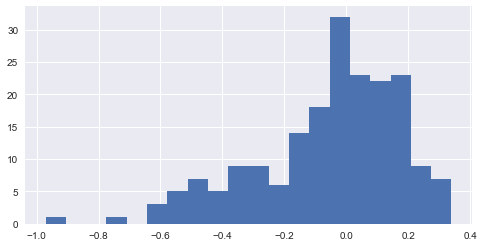

In [594]:
# Check distribution 

plt.rcParams['figure.figsize'] = (8.0,4.0)
(df["Frac_Gradient (PSI/ft)"]).hist(bins=20)

Text(0.5,1,'IQR = 2')

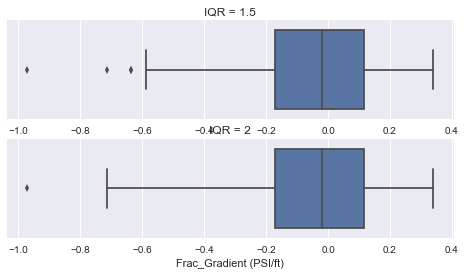

In [595]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df["Frac_Gradient (PSI/ft)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df["Frac_Gradient (PSI/ft)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [596]:
o3=outliers(df,"Frac_Gradient (PSI/ft)",2)
o3[["API","Frac_Gradient (PSI/ft)"]]

,API,Frac_Gradient (PSI/ft)
44,58,-0.970954


In [597]:
replace_by_mean(df,"Frac_Gradient (PSI/ft)",o3)

In [598]:
df.isnull().sum()

API                             0
Surf_X                          0
Surf_Y                          0
Date_Drilling                   0
Date_Completion                 0
Date_Production                 0
deltaT_Comp_Prod                0
Lateral_Length (ft)             0
Depth_TVD_PPLS (ft)             0
Erosion_PPLS (ft)               0
Pressure_PPLS (PSI)             0
TOC_PPLS (%)                    0
Vcarb_PPLS                      0
Vsand_PPLS                      0
Vclay_PPLS                      0
PR_PPLS                         0
YM_PPLS (PSI)                   0
RHOB_PPLS (g/cc)                0
Res_PPLS (Ohmm)                 0
GR_PPLS (API)                   0
DT_PPLS (us/ft)                 0
DTs_PPLS (us/ft)                0
Temperature (F)                 0
Temp_Anomaly (F)                0
S3Tect_PPLS (PSI)               0
S3_contrast_PPLS (PSI)          0
Heat_Flow (W/m2)                0
Zone                            0
Nbr_Stages                      0
Frac_Gradient 


## Write everything to csv

In [599]:
df.to_csv('cleaned_test_194_lines_all_features.csv',sep=',',na_rep='na')

In [600]:
dfSep = pd.read_csv('cleaned_test_194_lines_all_features.csv',sep=',',decimal=',')

In [601]:
dfSep =dfSep.iloc[:,29:]

In [602]:
dfSep.head()

,Nbr_Stages,Frac_Gradient (PSI/ft),Proppant_Designed (kg),Proppant_in_Formation (kg),Avg_Breakdown_Pressure (KPa),Avg_Treating_Pressure (KPa),Max_Treating_pressure (KPa),Min_Treating_Pressure (KPa),Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
0,-0.064286019,0.032733175,-0.34486145700000004,-0.335703739,-0.290074243,0.21157320100000002,-0.31285621199999997,0.8592299959999999,0.908860549,0.39562672200000004,0.667402475,-0.7163003848613388,-0.7404726690000001,0.13137383800000002,0.187081792,2.409200781,0.16013976300000002,-0.71073882
1,-1.086409818,-0.535630435,-0.8899164629999999,-0.92822845,-0.127296031,0.175862333,0.39902667299999994,0.944673212,-0.922311201,0.8967915120000001,0.285737714,-0.919600097,-1.103957192,-1.2824637490000002,0.667339212,-0.560749524,-1.149665874,2.085648761
2,-0.064286019,0.17360499399999998,-0.235139294,-0.225811633,0.345542175,0.7659447559999999,0.36221891,0.807368758,0.14885974400000002,-0.094971341,0.45904608,0.6141262120000001,1.029027658,1.103338988,-0.773433047,0.924225629,-0.58586878,-0.137426505
3,-1.086409818,-0.150075102,-0.033855001,-0.061579253,1.168888689,0.48765143299999997,-0.037396818,0.36835607200000003,0.9705209920000001,0.7559456878343207,0.332100462,-0.7822316579999999,0.450368029,-0.136075606,0.667339212,-0.560749524,0.595622169,1.887259994
4,0.008722824,0.217145223,0.324900915,0.29622389600000004,0.844093953,0.556331244,0.496467439,0.568511234,0.786055891,0.9859143109999999,0.323490237,0.41751656401211246,0.743256175,0.835686503,-1.253690467,0.181738053,0.151632803,-0.21651238399999997


In [603]:
dfSep.to_csv('cleaned_test_194_lines_47_last_features.csv',sep=',',na_rep='na')

## Data processing (41 remaining lines) 

In [906]:
df1 = pd.read_csv('Code +Data/TestSample.csv',sep=';',decimal=',')

In [907]:
df1.isnull().sum()

API                              0
Surf_X                           0
Surf_Y                           0
Date_Drilling                   12
Date_Completion                  9
Date_Production                  2
Lateral_Length (ft)              0
Depth_TVD_PPLS (ft)              0
Erosion_PPLS (ft)                0
Pressure_PPLS (PSI)              5
TOC_PPLS (%)                     0
Vcarb_PPLS                       0
Vsand_PPLS                       0
Vclay_PPLS                       0
PR_PPLS                          0
YM_PPLS (PSI)                    0
RHOB_PPLS (g/cc)                 0
Res_PPLS (Ohmm)                  0
GR_PPLS (API)                    0
DT_PPLS (us/ft)                  0
DTs_PPLS (us/ft)                 0
Temperature (F)                  0
Temp_Anomaly (F)                 0
S3Tect_PPLS (PSI)                0
S3_contrast_PPLS (PSI)           0
Heat_Flow (W/m2)                 0
Zone                             0
Nbr_Stages                      41
Frac_Gradient (PSI/f

In [908]:
df1.head()

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
0,633,0.201275,-0.577329,23/06/2013,26/10/2013,10/01/2014,-0.694826,0.641631,-0.356227,1.410748,...,0.908861,0.395627,0.667402,NaN,-0.740473,0.131374,0.187082,2.409201,0.160140,-0.710739
1,587,0.222609,0.670307,02/06/2012,03/07/2012,05/08/2013,-0.479516,-1.377997,-1.812483,1.605136,...,-0.922311,0.896792,0.285738,-0.919600,-1.103957,-1.282464,0.667339,-0.560750,-1.149666,2.085649
2,264,0.022105,0.404387,19/05/2013,24/07/2013,06/10/2013,0.310782,-0.775745,0.243462,-0.136014,...,0.148860,-0.094971,0.459046,0.614126,1.029028,1.103339,-0.773433,0.924226,-0.585869,-0.137427
3,680,0.384359,0.372793,18/08/2012,19/12/2012,12/06/2013,-0.624508,-1.082974,-1.922374,1.443630,...,0.970521,1.132279,0.332100,-0.782232,0.450368,-0.136076,0.667339,-0.560750,0.595622,1.887260
4,443,-0.138513,0.408803,11/09/2013,29/03/2014,11/05/2014,0.338785,-0.616106,0.556826,-1.011425,...,0.786056,0.985914,0.323490,NaN,0.743256,0.835687,-1.253690,0.181738,0.151633,-0.216512


### Date_Drilling / Date_Completion / Date Production

Text(0.5,0,'deltaT_Comp_Prod')

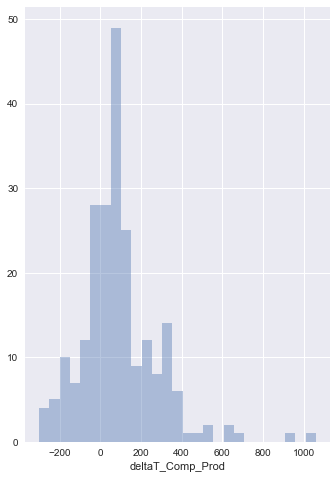

In [909]:
# Convert date variables to date time
# Missing dates

pd.to_datetime(df1["Date_Drilling"])
df1["Date_Drilling"]=pd.to_datetime(df1["Date_Drilling"])
df1["Date_Completion"]=pd.to_datetime(df1["Date_Completion"])
df1["Date_Production"]=pd.to_datetime(df1["Date_Production"])
df1["deltaT_Dril_Comp"]=(df1["Date_Completion"]-df1["Date_Drilling"]).dt.days
df1["deltaT_Comp_Prod"]=(df1["Date_Production"]-df1["Date_Completion"]).dt.days
###
cols = df1.columns.tolist()
df1=df1[cols[:6]+[cols[-2]]+[cols[-1]]+cols[6:-2]]

plt.figure(figsize=(12,8))
plt.subplot(122)
sns.distplot(df1.deltaT_Comp_Prod.dropna(),kde=False)
plt.xlabel("deltaT_Comp_Prod")

On prend le même mean que tout à l'heure, car maintenant on a peu de valeur (risque de non significativité et perte d'info). Il aurait été plus judicieux de travailler sur toutes les lignes pour les variables dates.

In [910]:
df1.iloc[:,3:8][df1.iloc[:,3:8]["Date_Production"].map(lambda x: x.year)==2016]

,Date_Drilling,Date_Completion,Date_Production,deltaT_Dril_Comp,deltaT_Comp_Prod
27,2015-09-09,NaT,2016-03-18,NaN,NaN
49,2013-04-07,NaT,2016-06-04,NaN,NaN
66,2015-02-08,2016-02-15,2016-03-18,372.0,32.0
113,NaT,NaT,2016-10-06,NaN,NaN
127,2013-12-13,2014-04-15,2016-11-05,123.0,935.0
204,2013-09-17,2013-03-12,2016-02-05,-189.0,1060.0


[(-300.0, 4.0),
 (-249.62962962962962, 5.0),
 (-199.25925925925924, 10.0),
 (-148.88888888888889, 7.0),
 (-98.518518518518505, 12.0),
 (-48.148148148148124, 28.0),
 (2.2222222222222285, 28.0),
 (52.592592592592609, 49.0),
 (102.96296296296299, 25.0),
 (153.33333333333337, 9.0),
 (203.70370370370375, 12.0),
 (254.07407407407413, 8.0),
 (304.44444444444446, 14.0),
 (354.81481481481489, 6.0),
 (405.18518518518522, 1.0),
 (455.55555555555566, 1.0),
 (505.92592592592592, 2.0),
 (556.2962962962963, 0.0),
 (606.66666666666674, 2.0),
 (657.03703703703707, 1.0),
 (707.40740740740739, 0.0),
 (757.77777777777783, 0.0),
 (808.14814814814827, 0.0),
 (858.5185185185187, 0.0),
 (908.88888888888891, 1.0),
 (959.25925925925935, 0.0),
 (1009.6296296296297, 1.0)]

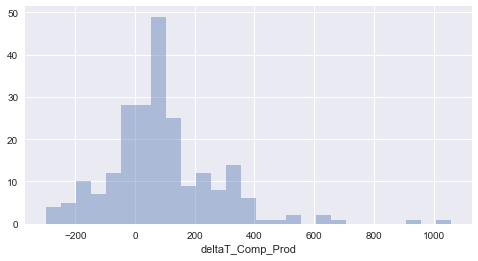

In [911]:
#Pour la Date_Comp
plt.figure()
[(h.get_x(),h.get_height()) for h in sns.distplot(df1.deltaT_Comp_Prod.dropna(),kde=False).patches]
#On prend donc la valeur la plus fréquente = 52 Jrs

[(-276.0, 3.0),
 (-222.8235294117647, 4.0),
 (-169.64705882352939, 3.0),
 (-116.47058823529412, 11.0),
 (-63.294117647058812, 11.0),
 (-10.117647058823536, 21.0),
 (43.058823529411768, 42.0),
 (96.235294117647072, 33.0),
 (149.41176470588238, 31.0),
 (202.58823529411768, 22.0),
 (255.76470588235293, 14.0),
 (308.94117647058829, 9.0),
 (362.11764705882354, 8.0),
 (415.2941176470589, 2.0),
 (468.47058823529414, 4.0),
 (521.64705882352951, 1.0),
 (574.82352941176487, 2.0)]

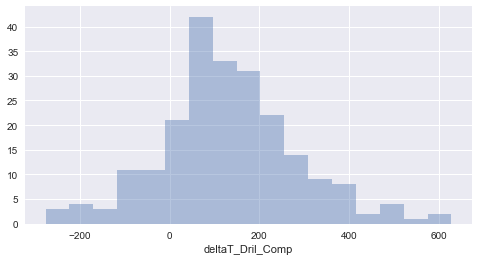

In [912]:
plt.figure()
[(h.get_x(),h.get_height()) for h in sns.distplot(df1.deltaT_Dril_Comp.dropna(),kde=False).patches]
#On prend donc le mean de la distribution: 43 Jrs

In [913]:
df1.loc[df1['deltaT_Comp_Prod'].isnull(),"deltaT_Dril_Comp"]=(df1.loc[df1['deltaT_Comp_Prod'].isnull(),"Date_Completion"]-df1.loc[df1['deltaT_Comp_Prod'].isnull(),"Date_Drilling"]).dt.days

In [914]:
df1.loc[df1['deltaT_Comp_Prod'].isnull(),"deltaT_Comp_Prod"]=(df1.loc[df1['deltaT_Comp_Prod'].isnull(),"Date_Production"]-df1.loc[df1['deltaT_Comp_Prod'].isnull(),"Date_Completion"]).dt.days

In [915]:
df1.loc[df1['deltaT_Comp_Prod'].isnull(),"deltaT_Comp_Prod"]

6     NaN
7     NaN
24    NaN
27    NaN
49    NaN
105   NaN
113   NaN
129   NaN
220   NaN
Name: deltaT_Comp_Prod, dtype: float64

In [916]:
#Filling the missing dates:

df1.loc[df1['Date_Production'].isnull(),'Date_Production']=pd.to_datetime('2012-06-27')
df1.loc[df1['Date_Completion'].isnull(),'Date_Completion']=df1.loc[df1['Date_Completion'].isnull(),'Date_Production']-dt.timedelta(days=np.mean(df1["deltaT_Comp_Prod"]))
df1.loc[df1['Date_Drilling'].isnull(),'Date_Drilling']=df1.loc[df1['Date_Drilling'].isnull(),'Date_Completion']-dt.timedelta(days=np.mean(df1["deltaT_Dril_Comp"]))

df1.loc[df1['deltaT_Comp_Prod'].isnull(),"deltaT_Dril_Comp"]=(df1.loc[df1['deltaT_Comp_Prod'].isnull(),"Date_Completion"]-df1.loc[df1['deltaT_Comp_Prod'].isnull(),"Date_Drilling"]).dt.days

In [925]:
df1.drop(['Date_Production'], axis = 1)
df1.drop(['Date_Completion'], axis = 1)
df1.drop(['Date_Drilling'], axis = 1)


,API,Surf_X,Surf_Y,Date_Completion,Date_Production,deltaT_Dril_Comp,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
0,633,0.201275,-0.577329,2013-10-26 00:00:00.000000,2014-10-01,125.0,340.0,-0.694826,0.641631,-0.356227,...,0.908861,0.395627,0.667402,NaN,-0.740473,0.131374,0.187082,2.409201,0.160140,-0.710739
1,587,0.222609,0.670307,2012-03-07 00:00:00.000000,2013-05-08,30.0,427.0,-0.479516,-1.377997,-1.812483,...,-0.922311,0.896792,0.285738,-0.919600,-1.103957,-1.282464,0.667339,-0.560750,-1.149666,2.085649
2,264,0.022105,0.404387,2013-07-24 00:00:00.000000,2013-06-10,66.0,-44.0,0.310782,-0.775745,0.243462,...,0.148860,-0.094971,0.459046,0.614126,1.029028,1.103339,-0.773433,0.924226,-0.585869,-0.137427
3,680,0.384359,0.372793,2012-12-19 00:00:00.000000,2013-12-06,123.0,352.0,-0.624508,-1.082974,-1.922374,...,0.970521,1.132279,0.332100,-0.782232,0.450368,-0.136076,0.667339,-0.560750,0.595622,1.887260
4,443,-0.138513,0.408803,2014-03-29 00:00:00.000000,2014-11-05,140.0,221.0,0.338785,-0.616106,0.556826,...,0.786056,0.985914,0.323490,NaN,0.743256,0.835687,-1.253690,0.181738,0.151633,-0.216512
5,504,1.192954,-1.397559,2013-06-15 00:00:00.000000,2013-11-09,52.0,147.0,-1.382447,1.004672,0.604587,...,1.458069,0.817088,0.881830,-1.414946,-1.222450,-1.898990,-0.773433,0.924226,-0.404286,-0.265783
6,158,-2.107472,1.895357,2015-06-18 15:17:31.327434,2015-09-20,132.0,NaN,-0.084989,-0.626790,1.113459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,581,0.404052,-2.614247,2012-03-25 15:17:31.327434,2012-06-27,132.0,NaN,-0.898312,3.217887,-0.350948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,55,0.311317,0.337037,2013-10-09 00:00:00.000000,2013-05-12,191.0,-150.0,-0.473915,-0.963990,-1.698491,...,-1.094387,-1.340336,0.239375,-0.021115,0.163318,0.532959,-1.253690,0.181738,-0.447450,-0.202208
9,275,-0.072997,0.589710,2014-07-20 00:00:00.000000,2014-10-09,155.0,81.0,0.361810,-0.950945,0.088588,...,-0.116997,-0.309627,0.224804,-0.617362,-0.202522,-0.760498,-1.253690,0.181738,0.598837,-0.203911


### Lateral_Length (ft)

In [926]:
#MV
df1["Lateral_Length (ft)"].isnull().sum()

0

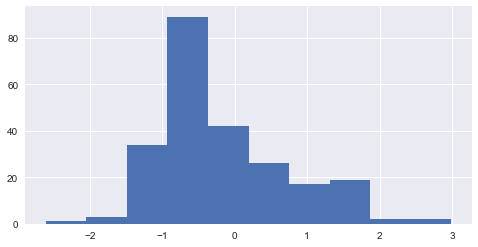

In [927]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1.iloc[:,8]).hist()

Text(0.5,1,'IQR = 2')

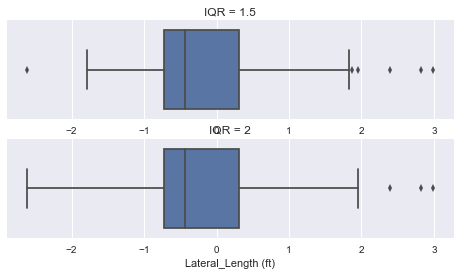

In [928]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["Lateral_Length (ft)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df1["Lateral_Length (ft)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [929]:
o0=outliers(df,"Lateral_Length (ft)",2)
o0

,API,Surf_X,Surf_Y,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),TOC_PPLS (%),Vcarb_PPLS,...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
63,78,-0.138067,-0.514181,64.0,2.991574,0.885346,0.943895,0.435490,0.466020,0.110663,...,-0.504324,-0.827698,-0.840636,-0.590617,0.028517,0.193651,0.667339,0.181738,0.584756,-0.800857
169,643,1.057074,-0.167117,165.0,2.828536,-0.721269,1.276853,-0.484921,-1.664238,1.598042,...,0.287072,-0.065129,0.176114,0.916444,1.344138,0.761554,1.455454,0.120816,-0.530388,-0.161906


In [930]:
replace_by_mean(df1,"Depth_TVD_PPLS (ft)",o0)

### Depth_TVD_PPLS (ft)

In [931]:
#MV

df["Depth_TVD_PPLS (ft)"].isnull().sum()

0

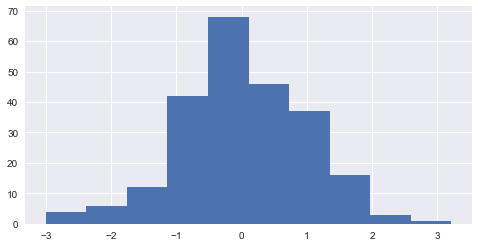

In [932]:
# Check distribution

plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["Depth_TVD_PPLS (ft)"]).hist()

Text(0.5,1,'IQR = 2')

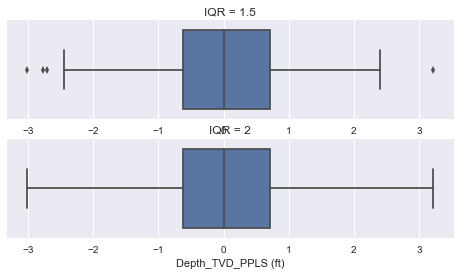

In [933]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["Depth_TVD_PPLS (ft)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df1["Depth_TVD_PPLS (ft)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [934]:
o1=outliers(df1,"Depth_TVD_PPLS (ft)",2)
o1

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Dril_Comp,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
7,581,0.404052,-2.614247,2011-11-13 15:30:33.227886,2012-03-25 15:17:31.327434,2012-06-27,132.0,NaN,-0.898312,3.217887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,353,-2.069487,3.150692,2014-10-14 00:00:00.000000,2015-06-02 00:00:00.000000,2015-04-18,231.0,-45.0,1.094236,-3.006632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [935]:
replace_by_mean(df1,"Depth_TVD_PPLS (ft)",o1)

### Erosion_PPLS (ft)

In [936]:
#MV

df1["Erosion_PPLS (ft)"].isnull().sum()

0

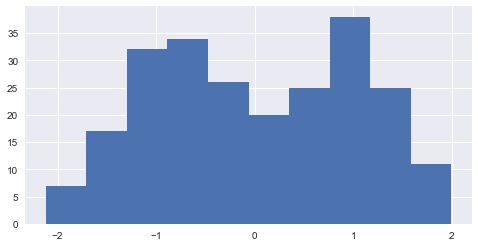

In [937]:
# Check distribution 

plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["Erosion_PPLS (ft)"]).hist()

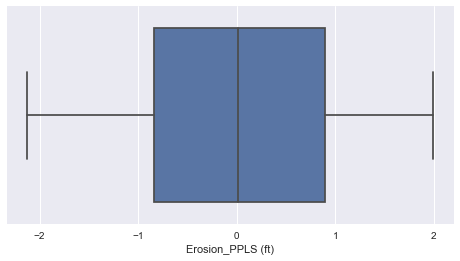

In [938]:
sns.boxplot(df1["Erosion_PPLS (ft)"],whis=1.5)

### Zone



Taking in consideration Andi s analysis about the zone Attribute, It s a categorial variable, i ll change the zone values to 0-9


In [939]:
df1.Zone.unique()

array([-0.45747705,  1.10622683, -0.97871168, -2.54241556,  0.58499221,
       -2.02118093,  2.66993072,  2.14869609,  1.62746146,  0.06375758,
       -1.49994631])

In [940]:
df1 =   df1.replace({'Zone':{
        df1.Zone.unique()[0]: 'Z0',
        df1.Zone.unique()[1]: 'Z1',
        df1.Zone.unique()[2]: 'Z2',
        df1.Zone.unique()[3]: 'Z3',
        df1.Zone.unique()[4]: 'Z4',
        df1.Zone.unique()[5]: 'Z5',
        df1.Zone.unique()[6]: 'Z6',
        df1.Zone.unique()[7]: 'Z7',
        df1.Zone.unique()[8]: 'Z8',
        df1.Zone.unique()[9]: 'Z9',
        df1.Zone.unique()[10]: 'Z10'
        }
                    }
)



### Pressure_PPLS (PSI)

In [941]:
#MV

df1["Pressure_PPLS (PSI)"].isnull().sum()

5

In [942]:
missing= np.isnan(df1["Pressure_PPLS (PSI)"])
df1.loc[df1["Pressure_PPLS (PSI)"].isnull(), ["API","Pressure_PPLS (PSI)","Zone"]]

,API,Pressure_PPLS (PSI),Zone
49,640,NaN,Z6
95,373,NaN,Z1
113,214,NaN,Z1
138,583,NaN,Z1
181,175,NaN,Z1


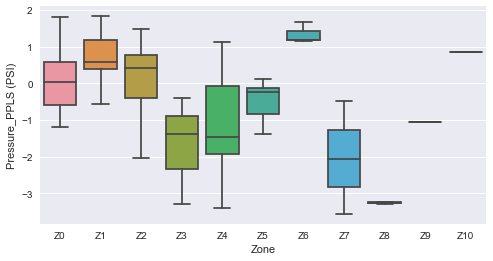

In [943]:
sns.boxplot(x='Zone', y='Pressure_PPLS (PSI)', data=df1,whis=1.5)



An idea that would be good is to affect to missing values the mean the variable in the zone of the well


In [944]:
w640=np.mean(df1[df1["Zone"]=="Z6"][~missing]['Pressure_PPLS (PSI)'])
w373=np.mean(df1[df1["Zone"]=="Z1"][~missing]['Pressure_PPLS (PSI)'])
w214=np.mean(df1[df1["Zone"]=="Z1"][~missing]['Pressure_PPLS (PSI)'])
w583=np.mean(df1[df1["Zone"]=="Z1"][~missing]['Pressure_PPLS (PSI)'])
w175=np.mean(df1[df1["Zone"]=="Z1"][~missing]['Pressure_PPLS (PSI)'])

C:\Users\EDDAHABI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\EDDAHABI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\EDDAHABI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\EDDAHABI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\EDDAHABI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [945]:
df1.loc[missing,"Pressure_PPLS (PSI)"]=w640,w373,w214,w583,w175

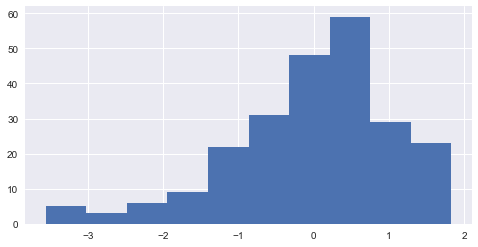

In [946]:
# Check distribution 

plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["Pressure_PPLS (PSI)"]).hist()

Text(0.5,1,'IQR = 2')

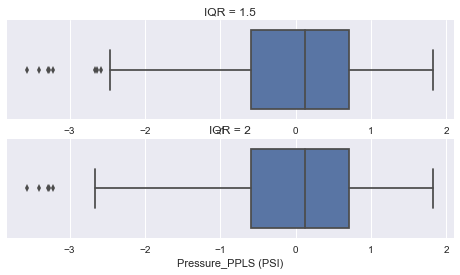

In [947]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["Pressure_PPLS (PSI)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df1["Pressure_PPLS (PSI)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')



This is same case as Lateral length variable, outliers very close to each other, i suggest not to change the values


### TOC_PPLS (%)

In [948]:
#MV

df1["TOC_PPLS (%)"].isnull().sum()

0

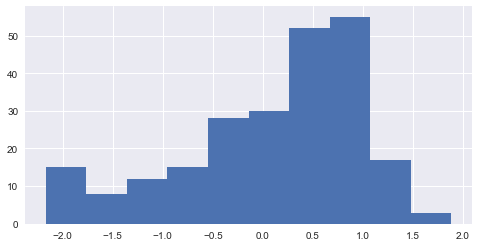

In [949]:
# Check distribution 

plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["TOC_PPLS (%)"]).hist()

Text(0.5,1,'IQR = 2')

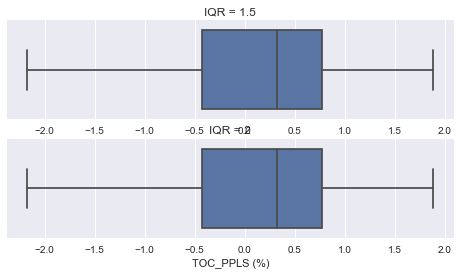

In [950]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["TOC_PPLS (%)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df1["TOC_PPLS (%)"],whis=2.2,ax=ax2)
ax2.set_title('IQR = 2')

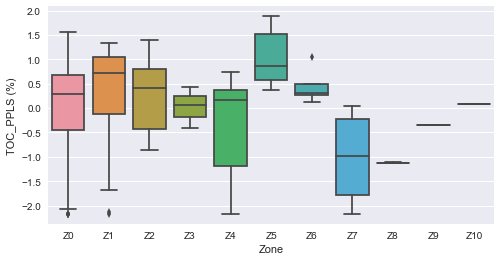

In [951]:
sns.boxplot(x='Zone', y='TOC_PPLS (%)', data=df1,whis=1.5)

In [952]:
o2=outliers(df1,"TOC_PPLS (%)",2.3)
o2.loc[:,["TOC_PPLS (%)","Zone"]]

,TOC_PPLS (%),Zone
6,-2.169983,Z0
24,-2.169983,Z0
27,-2.139332,Z1
50,-2.169983,Z7
66,-2.169983,Z1
74,-2.169983,Z0
105,-2.169983,Z0
128,-2.169983,Z4
183,-2.154658,Z4
204,-2.070367,Z0


In [953]:
df1.loc[o2.index,"TOC_PPLS (%)"]=np.mean(df1[(df1.Zone =="Z0") | (df1.Zone == "Z1")| (df1.Zone == "Z7") | (df1.Zone == "Z4")]["TOC_PPLS (%)"])

### Vcarb_PPLS Vsand_PPLS Vclay_PPLS

In [954]:
print(len(df1["Vcarb_PPLS"].unique()))
print(len(df1["Vsand_PPLS"].unique()))
print(len(df1["Vclay_PPLS"].unique()))

34
29
17


(array([  4.,  14.,  39.,  82.,  31.,  18.,  15.,   1.,  16.,  15.]),
 array([-1.95779936, -1.51358337, -1.06936738, -0.62515138, -0.18093539,
         0.2632806 ,  0.70749659,  1.15171259,  1.59592858,  2.04014457,
         2.48436056]),
 <a list of 10 Patch objects>)

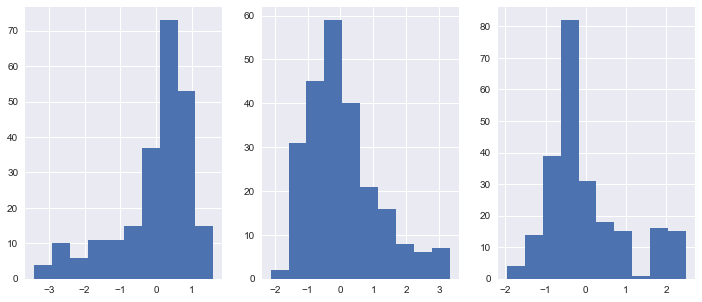

In [955]:
# Check distribution of volumes:
f, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
ax1.hist(df1["Vcarb_PPLS"])
ax2.hist(df1["Vsand_PPLS"])
ax3.hist(df1["Vclay_PPLS"])

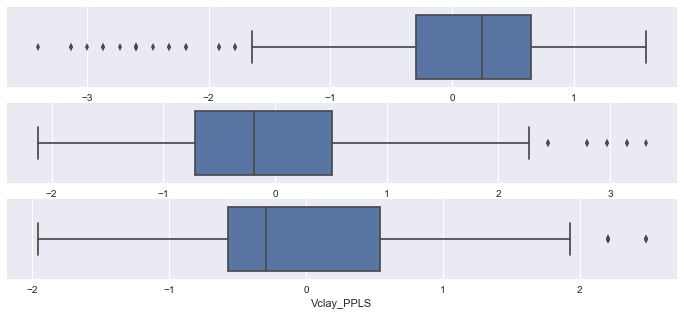

In [956]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2,ax3) = plt.subplots(3,1,figsize=(12,5))
sns.boxplot(df1["Vcarb_PPLS"],whis=1.5,ax=ax1)
sns.boxplot(df1["Vsand_PPLS"],whis=1.5,ax=ax2)
sns.boxplot(df1["Vclay_PPLS"],whis=1.5,ax=ax3)



As the variables are taking a fixed number of values, dealing with outliers can biase results because we ll have to change those steps which would be the same in test


### PR_PPLS

In [957]:
print(len(df1["PR_PPLS"].unique()))

12


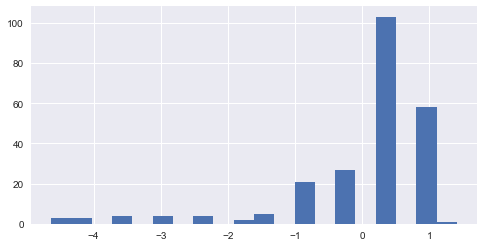

In [958]:
# Check distribution 

plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["PR_PPLS"]).hist(bins=20)

In [959]:
df1[df1.PR_PPLS<=-3].PR_PPLS

42    -3.534745
52    -4.084041
55    -4.633336
119   -4.633336
123   -4.084041
135   -3.534745
147   -4.084041
187   -3.534745
202   -4.633336
214   -3.534745
Name: PR_PPLS, dtype: float64

### YM_PPLS (PSI)

In [960]:
print(len(df1["YM_PPLS (PSI)"].unique()))

235


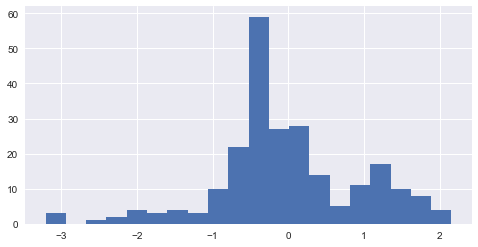

In [961]:
# Check distribution

plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["YM_PPLS (PSI)"]).hist(bins=20)

Text(0.5,1,'IQR = 2')

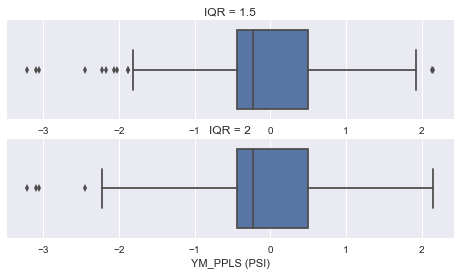

In [962]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["YM_PPLS (PSI)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df1["YM_PPLS (PSI)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [963]:
o4=outliers(df1,"YM_PPLS (PSI)",2)
o4[["API","YM_PPLS (PSI)"]]

,API,YM_PPLS (PSI)
25,278,-2.218526
113,214,-3.206120
117,531,-2.164898
130,577,-3.055046
141,641,-2.444895
181,175,-3.093335


In [964]:
replace_by_mean(df1,"YM_PPLS (PSI)",o4)

### RHOB_PPLS (g/cc)

In [965]:
print(len(df1["RHOB_PPLS (g/cc)"].unique()))

58


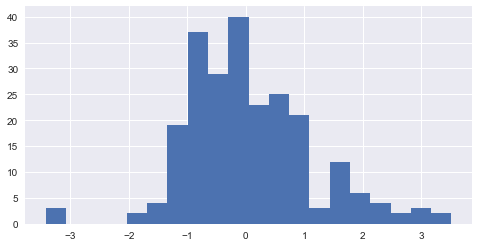

In [966]:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["RHOB_PPLS (g/cc)"]).hist(bins=20)

Text(0.5,1,'IQR = 2')

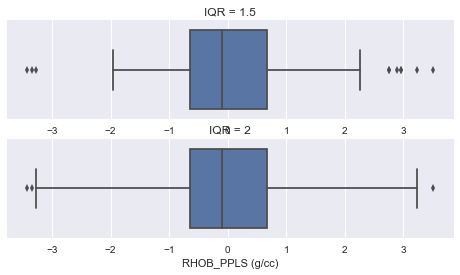

In [967]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["RHOB_PPLS (g/cc)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df1["RHOB_PPLS (g/cc)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

we can notice that we have a group of extreme values (>2) , but the same problem for volumes, if we change the data to other values we can change the values used for the steps

### Res_PPLS (Ohmm)

In [968]:
print(len(df1["Res_PPLS (Ohmm)"].unique()))

232




This is not like the previous variable and volumes


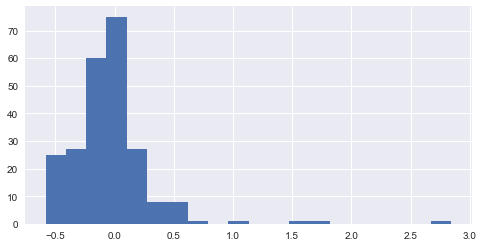

In [969]:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["Res_PPLS (Ohmm)"]).hist(bins=20)

Text(0.5,1,'IQR = 2')

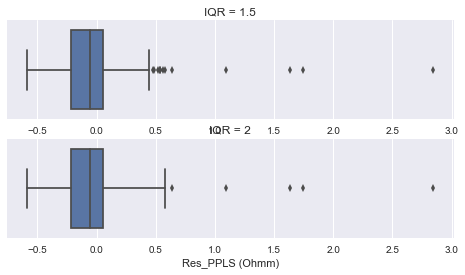

In [970]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["Res_PPLS (Ohmm)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df1["Res_PPLS (Ohmm)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [971]:
ind=df1[df1["Res_PPLS (Ohmm)"]>1].index

In [972]:
df1.loc[ind,"Res_PPLS (Ohmm)"]=np.mean(df1["Res_PPLS (Ohmm)"])

In [973]:
print(df1.groupby("Zone")["Res_PPLS (Ohmm)"].mean())

Zone
Z0    -0.145491
Z1    -0.059356
Z10   -0.038908
Z2     0.043588
Z3    -0.073895
Z4     0.080657
Z5    -0.031816
Z6    -0.300770
Z7    -0.334254
Z8    -0.027237
Z9    -0.280112
Name: Res_PPLS (Ohmm), dtype: float64


### GR_PPLS (API)


In [974]:
print(len(df1["GR_PPLS (API)"].unique()))

219


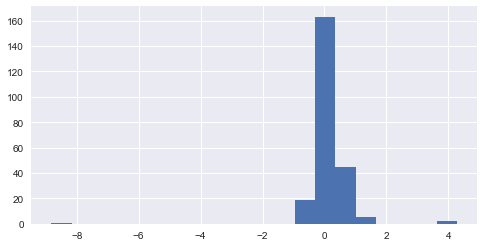

In [975]:
# Check distribution 

plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["GR_PPLS (API)"]).hist(bins=20)

In [976]:
ind=df1[df1["GR_PPLS (API)"]<-2].index

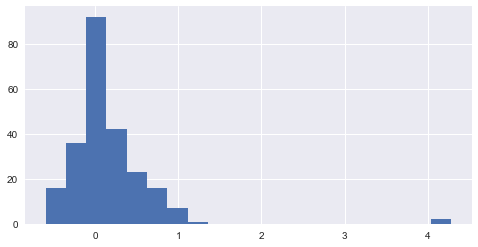

In [977]:
df1.loc[ind,"GR_PPLS (API)"]=np.mean(df1["GR_PPLS (API)"])
(df1["GR_PPLS (API)"]).hist(bins=20)

Text(0.5,1,'IQR = 2')

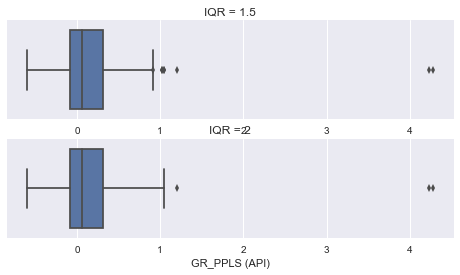

In [978]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["GR_PPLS (API)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df1["GR_PPLS (API)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [979]:
print(df1.groupby("Zone")["GR_PPLS (API)"].mean())

Zone
Z0     0.045370
Z1     0.053868
Z10    0.048708
Z2     0.260079
Z3     0.111490
Z4     0.286980
Z5    -0.045681
Z6     0.494126
Z7     0.305403
Z8     4.256448
Z9     0.429193
Name: GR_PPLS (API), dtype: float64


In [980]:
o=outliers(df1,'GR_PPLS (API)',1.5)
ind1=o[o['GR_PPLS (API)']>1.5][['GR_PPLS (API)','Zone']].index
print(o[o['GR_PPLS (API)']>1.5][['GR_PPLS (API)','Zone']])

     GR_PPLS (API) Zone
92        4.284168   Z8
140       4.228728   Z8


In [981]:
df1.loc[ind1,'GR_PPLS (API)']=df1.groupby("Zone")["GR_PPLS (API)"].mean()[8]

### DT_PPLS (us/ft)

In [982]:
print(len(df1["DT_PPLS (us/ft)"].unique()))

193


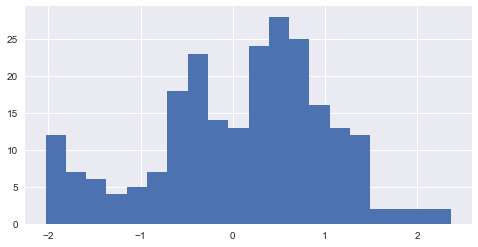

In [983]:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["DT_PPLS (us/ft)"]).hist(bins=20)

### DTs_PPLS (us/ft)

In [984]:
print(len(df1["DTs_PPLS (us/ft)"].unique()))

228


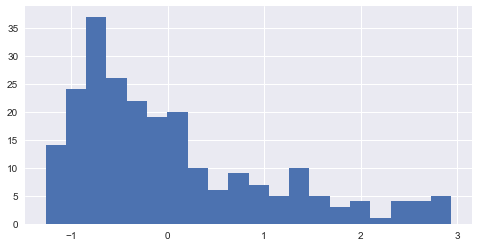

In [985]:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["DTs_PPLS (us/ft)"]).hist(bins=20)

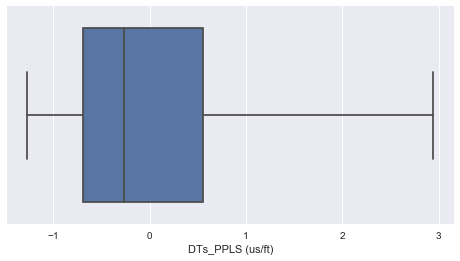

In [986]:
sns.boxplot(df1["DTs_PPLS (us/ft)"],whis=2)

### Temperature (F)

In [987]:
print(len(df1["Temperature (F)"].unique()))

220


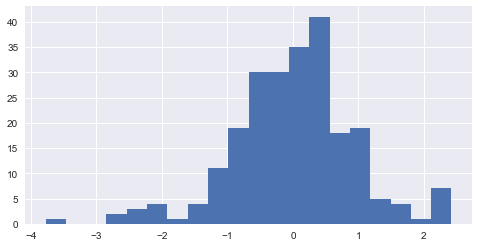

In [988]:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["Temperature (F)"]).hist(bins=20)

Text(0.5,1,'IQR = 2')

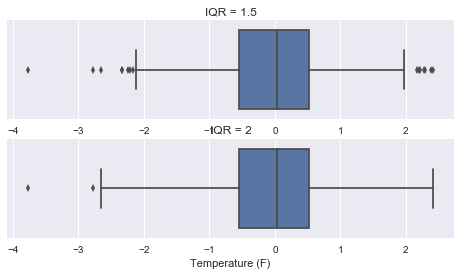

In [989]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["Temperature (F)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df1["Temperature (F)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

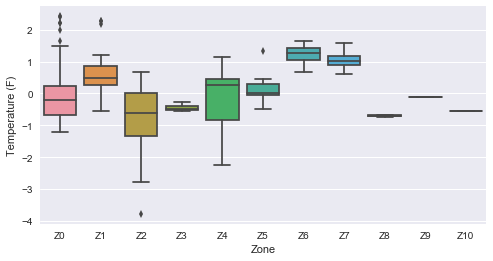

In [990]:
sns.boxplot(x='Zone', y='Temperature (F)', data=df1,whis=1.5)

In [991]:
o5=outliers(df1,"Temperature (F)",2.5)
o2.loc[:,["Temperature (F)","Zone"]]

,Temperature (F),Zone
6,-0.051333,Z0
24,-0.074606,Z0
27,0.902845,Z1
50,0.987624,Z7
66,0.871261,Z1
74,0.392509,Z0
105,-0.016424,Z0
128,0.811417,Z4
183,0.470639,Z4
204,-0.129463,Z0


In [992]:
df1.loc[o2.index,"Temperature (F)"]=np.mean(df1[(df1.Zone =="Z0") | (df1.Zone == "Z1")| (df1.Zone == "Z7") | (df1.Zone == "Z4")]["TOC_PPLS (%)"])

### Temp_Anomaly (F)

In [993]:
print(len(df1["Temp_Anomaly (F)"].unique()))

216


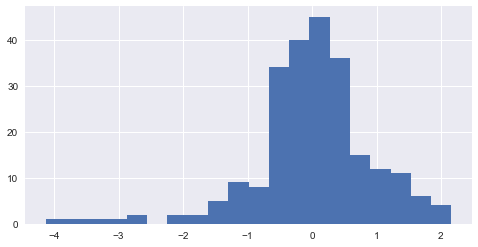

In [994]:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["Temp_Anomaly (F)"]).hist(bins=20)

Text(0.5,1,'IQR = 2')

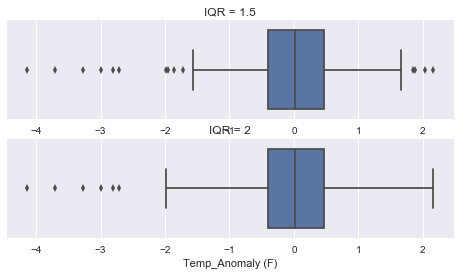

In [995]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["Temp_Anomaly (F)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df1["Temp_Anomaly (F)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

### S3Tect_PPLS (PSI)

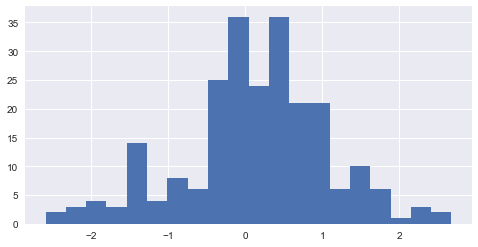

In [996]:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["S3Tect_PPLS (PSI)"]).hist(bins=20)

Text(0.5,1,'IQR = 2')

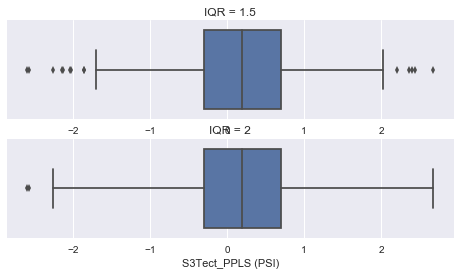

In [997]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["S3Tect_PPLS (PSI)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(df1["S3Tect_PPLS (PSI)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [998]:
o3 = outliers(df1,"S3Tect_PPLS (PSI)",2)
o3[["API","S3Tect_PPLS (PSI)"]]

,API,S3Tect_PPLS (PSI)
25,278,-1.861696
27,11,-2.254188
66,332,-2.147753
113,214,-2.125430
130,577,-2.029884
141,641,-1.854275
177,201,-2.591688
181,175,-2.042029
201,15,-2.576273
215,331,2.677601


### S3_contrast_PPLS (PSI)

In [999]:
print(len(df1["S3_contrast_PPLS (PSI)"].unique()))

233


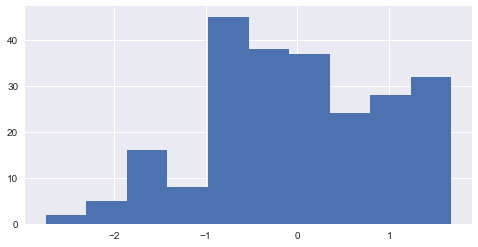

In [1000]:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["S3_contrast_PPLS (PSI)"]).hist()

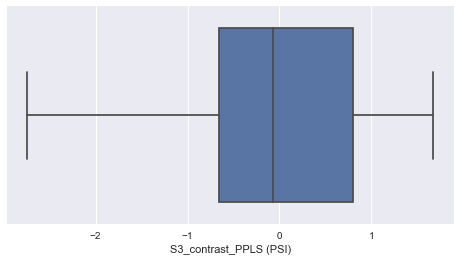

In [1001]:
sns.boxplot(df1["S3_contrast_PPLS (PSI)"],whis=2)

### Heat_Flow (W/m2)

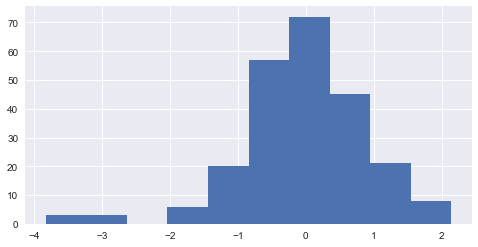

In [1002]:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(df1["Heat_Flow (W/m2)"]).hist()

Text(0.5,1,'IQR = 1.5')

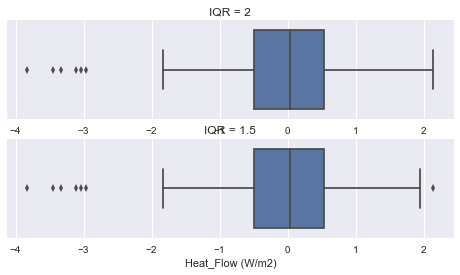

In [1003]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df1["Heat_Flow (W/m2)"],whis=2,ax=ax1)
ax1.set_title('IQR = 2')
sns.boxplot(df1["Heat_Flow (W/m2)"],whis=1.5,ax=ax2)
ax2.set_title('IQR = 1.5')

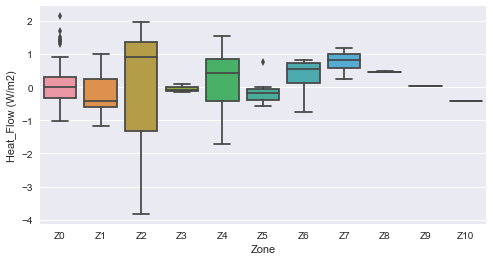

In [1004]:
sns.boxplot(x='Zone', y='Heat_Flow (W/m2)', data=df1,whis=1.5)

In [1005]:
df1.loc[o2.index,"Heat_Flow (W/m2)"]=np.mean(df1[(df1.Zone =="Z0")])

In [1006]:
df1.loc[df1["Heat_Flow (W/m2)"].isnull()]=np.mean(df1["Heat_Flow (W/m2)"])

In [1007]:
df1["Heat_Flow (W/m2)"].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
205    False
206    False
207    False
208    False
209    False
210    False
211    False
212    False
213    False
214    False
215    False
216    False
217    False
218    False
219    False
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
233    False
234    False
Name: Heat_Flow (W/m2), Length: 235, dtype: bool

In [1008]:
df1=df1.iloc[:,:29]

In [1009]:
df1.head()

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Dril_Comp,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),...,Res_PPLS (Ohmm),GR_PPLS (API),DT_PPLS (us/ft),DTs_PPLS (us/ft),Temperature (F),Temp_Anomaly (F),S3Tect_PPLS (PSI),S3_contrast_PPLS (PSI),Heat_Flow (W/m2),Zone
0,633.0,0.201275,-0.577329,2013-06-23,2013-10-26,2014-10-01,125.0,340.0,-0.694826,0.641631,...,0.085040,0.601589,-0.475649,-1.136832,-0.879174,-0.425619,0.633179,1.126267,-0.116028,Z0
1,587.0,0.222609,0.670307,2012-02-06,2012-03-07,2013-05-08,30.0,427.0,-0.479516,-1.377997,...,-0.004257,0.222623,0.974184,1.169450,0.959364,0.746294,-0.134025,-0.512469,0.157581,Z1
2,264.0,0.022105,0.404387,2013-05-19,2013-07-24,2013-06-10,66.0,-44.0,0.310782,-0.775745,...,-0.027598,0.155791,0.673444,1.652438,0.555418,0.318873,-0.442842,-0.753857,0.330198,Z1
3,680.0,0.384359,0.372793,2012-08-18,2012-12-19,2013-12-06,123.0,352.0,-0.624508,-1.082974,...,-0.071392,0.194523,0.951740,-0.141177,0.718326,0.368609,0.357767,-0.242637,-0.613823,Z1
4,443.0,-0.138513,0.408803,2013-11-09,2014-03-29,2014-11-05,140.0,221.0,0.338785,-0.616106,...,-0.107029,0.175537,0.440035,2.235950,0.625236,0.443213,-0.634614,-1.435096,0.696920,Z0


In [1010]:
df1.to_csv('cleaned_test_all_lines_26_features.csv',sep=',',na_rep='na')
